# INN Hotels Project by Meng Zhang

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# Installing the libraries with the specified version.
# !pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

import scipy.stats as stats

import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
    roc_curve,
    roc_auc_score,
    precision_recall_curve
)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Supervised Learning - Classification/Project 4/INNHotelsGroup.csv')

## Data Overview

- Observations
- Sanity checks

In [5]:
# Check the first rows of data
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [6]:
# Check the last few rows of data
df.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270              167.80                       1   Not_Canceled  
36271               90.95                       2       Canceled  
36272               98.39                       2   Not_Canceled  
36273               94.50                       0       Canceled  
36274              161.67                       0   Not_Canceled

In [7]:
# Check data shape
df.shape

(36275, 19)

- The dataset has 36275 columns and 19 rows.

In [8]:
# Check the data types of all the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

- 13 columns of the data are in the integer type, 1 column is in the float type, and 5 columns of the data have object type.
- The object type of data are booking status, market segment type, room type reserved, type of meal plan, and booking ID.
- The float type of data is the average price per room.
- The rest data are in the integer type.

In [9]:
# Check the statistics of dataset
df.describe(include='all').T

count unique           top   freq  \
Booking_ID                              36275  36275      INN00001      1   
no_of_adults                          36275.0    NaN           NaN    NaN   
no_of_children                        36275.0    NaN           NaN    NaN   
no_of_weekend_nights                  36275.0    NaN           NaN    NaN   
no_of_week_nights                     36275.0    NaN           NaN    NaN   
type_of_meal_plan                       36275      4   Meal Plan 1  27835   
required_car_parking_space            36275.0    NaN           NaN    NaN   
room_type_reserved                      36275      7   Room_Type 1  28130   
lead_time                             36275.0    NaN           NaN    NaN   
arrival_year                          36275.0    NaN           NaN    NaN   
arrival_month                         36275.0    NaN           NaN    NaN   
arrival_date                          36275.0    NaN           NaN    NaN   
market_segment_type                     36275      5        Online  23214   
repeated_guest                        36275.0    NaN           NaN    NaN   
no_of_previous_cancellations          36275.0    NaN           NaN    NaN   
no_of_previous_bookings_not_canceled  36275.0    NaN           NaN    NaN   
avg_price_per_room                    36275.0    NaN           NaN    NaN   
no_of_special_requests                36275.0    NaN           NaN    NaN   
booking_status                          36275      2  Not_Canceled  24390   

                                             mean        std     min     25%  \
Booking_ID                                    NaN        NaN     NaN     NaN   
no_of_adults                             1.844962   0.518715     0.0     2.0   
no_of_children                           0.105279   0.402648     0.0     0.0   
no_of_weekend_nights                     0.810724   0.870644     0.0     0.0   
no_of_week_nights                          2.2043   1.410905     0.0     1.0   
type_of_meal_plan                             NaN        NaN     NaN     NaN   
required_car_parking_space               0.030986   0.173281     0.0     0.0   
room_type_reserved                            NaN        NaN     NaN     NaN   
lead_time                               85.232557  85.930817     0.0    17.0   
arrival_year                          2017.820427   0.383836  2017.0  2018.0   
arrival_month                            7.423653   3.069894     1.0     5.0   
arrival_date                            15.596995   8.740447     1.0     8.0   
market_segment_type                           NaN        NaN     NaN     NaN   
repeated_guest                           0.025637   0.158053     0.0     0.0   
no_of_previous_cancellations             0.023349   0.368331     0.0     0.0   
no_of_previous_bookings_not_canceled     0.153411   1.754171     0.0     0.0   
avg_price_per_room                     103.423539  35.089424     0.0    80.3   
no_of_special_requests                   0.619655   0.786236     0.0     0.0   
booking_status                                NaN        NaN     NaN     NaN   

                                         50%     75%     max  
Booking_ID                               NaN     NaN     NaN  
no_of_adults                             2.0     2.0     4.0  
no_of_children                           0.0     0.0    10.0  
no_of_weekend_nights                     1.0     2.0     7.0  
no_of_week_nights                        2.0     3.0    17.0  
type_of_meal_plan                        NaN     NaN     NaN  
required_car_parking_space               0.0     0.0     1.0  
room_type_reserved                       NaN     NaN     NaN  
lead_time                               57.0   126.0   443.0  
arrival_year                          2018.0  2018.0  2018.0  
arrival_month                            8.0    10.0    12.0  
arrival_date                            16.0    23.0    31.0  
market_segment_type                      NaN     NaN     NaN  
repeated_guest  

- There are 36275 unique bookings in the dataset.
- There are four types of meal plans in the dataset. Customers chose meal plan 1 most.
- There are seven types of rooms in the dataset. Customers chose room type 1 most.
- The average lead time of booking is 85 days.
- There are five types of market segment designation in the dataset. Most customers booked online.
- The average price per room is 103.4 euros.
- The majority of the bookings were not canceled in the dataset.

In [10]:
# Double check the unique values for booking ID
df['Booking_ID'].nunique()

36275

- Since all the booking IDs are unique, we can drop this column.

In [11]:
# Drop the booking ID column in the dataset
df.drop(['Booking_ID'], axis=1, inplace=True)
# Check the first few rows of data again
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [12]:
# Checking missing values
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

- There are no missing values in the dataset.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

# Univariate Analysis

In [13]:
# Define a function to plot histgram and box plots.

def histogram_boxplot(data, feature, figsize=(10,6), kde=False, bins=None):
  """
  Boxplot and histogram combined

  data: dataframe
  feature: dataframe column
  figsize: size of figure (default (10,6))
  kde: whether to show the density curve (default False)
  bins: number of bins for histogram (default None)
  """
  f2, (ax_box2, ax_hist2) = plt.subplots(
      nrows=2,
      sharex=True,
      gridspec_kw={"height_ratios": (0.25, 0.75)},
      figsize=figsize,
  )
  sns.boxplot(
      data=data, x=feature, ax=ax_box2, showmeans=True, color='violet'
  )
  sns.histplot(
      data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
  ) if bins else sns.histplot(
      data=data, x=feature, kde=kde, ax=ax_hist2
  )
  ax_hist2.axvline(
      data[feature].mean(), color='green', linestyle='--'
  ) # Add mean to the histogram
  ax_hist2.axvline(
      data[feature].median(), color='black', linestyle='-'
  ) # Add median to the histogram

In [14]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

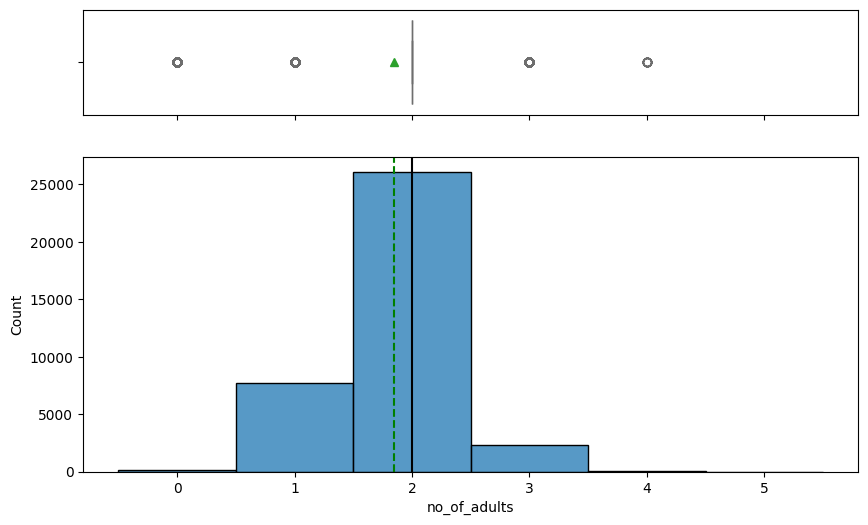

In [15]:
# Check no_of_adults
histogram_boxplot(df, 'no_of_adults', bins=list(np.arange(-0.5,6.5,1)))

- The majority of bookings have two adults, indicated by the median values and 25% and 75% percentile values.
- Some of the bookings have 1 adult or 3 adults.

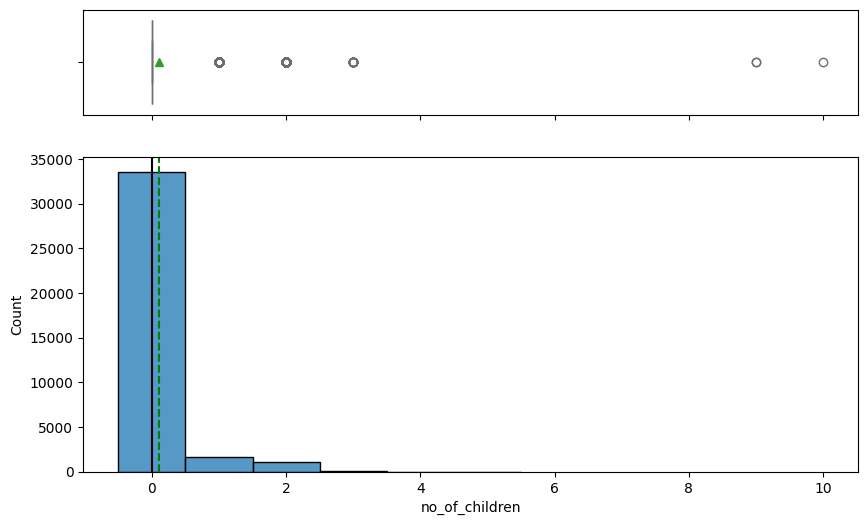

In [16]:
# Check no_of_children
histogram_boxplot(df, 'no_of_children', bins=list(np.arange(-0.5,6.5,1)))

- Most of bookings don't have children.
- The most number of children in the booking is 10.

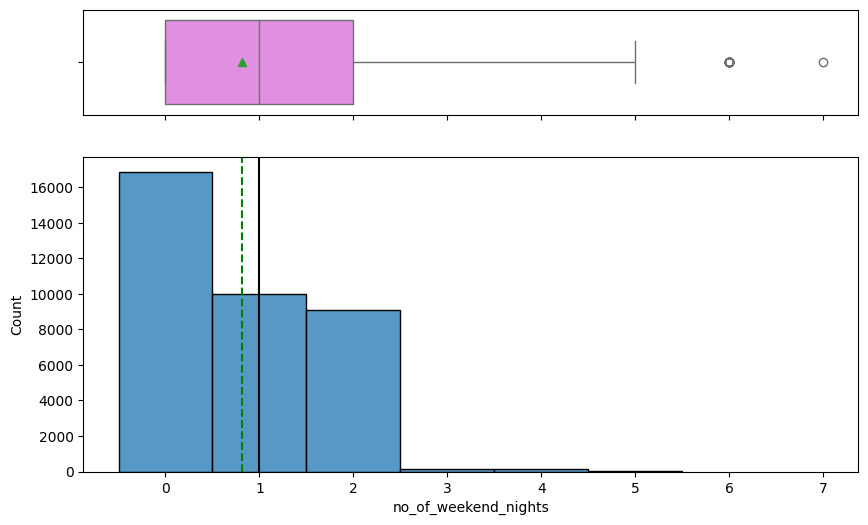

In [17]:
# Check no_of_weekend_nights
histogram_boxplot(df, 'no_of_weekend_nights', bins=list(np.arange(-0.5,6.5,1)))

- At least 25% of the bookings are not during the weekend.
- The total number of bookings covering the weekend (the sum of 1 weekend night and 2 weekend nights bookings) is larger than the number of bookings that only during weekdays.

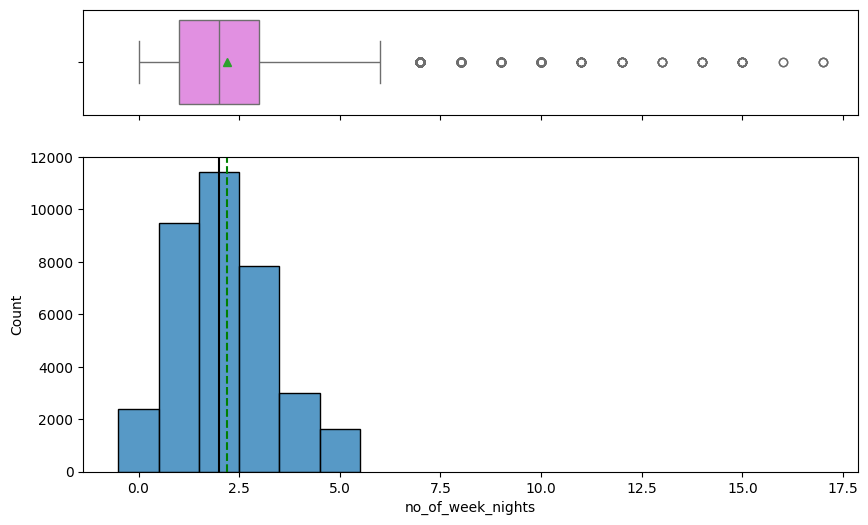

In [18]:
# Check no_of_weekend_nights
histogram_boxplot(df, 'no_of_week_nights', bins=list(np.arange(-0.5,6.5,1)))

- The 2-night-weekday booking occurs the most in the dataset, followed by the 1-night-weekday booking.
- At least 75% of the bookings stay for less than 3 nights during weekdays.
- The longest stay booked 17 weekdays in the dataset.

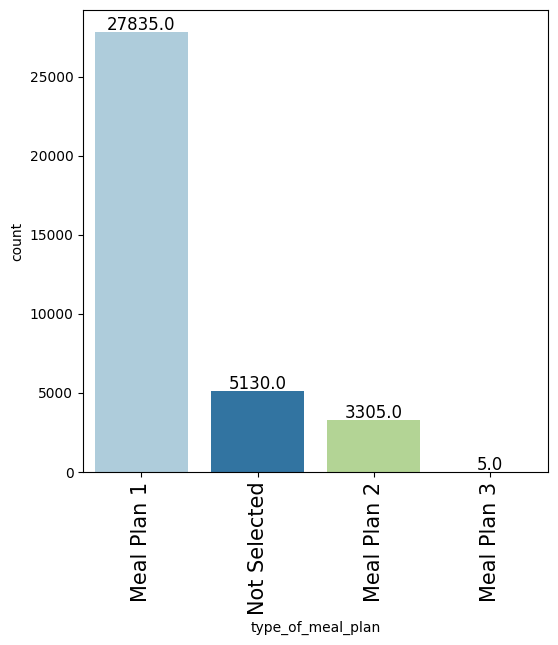

In [19]:
# Check type of meal
labeled_barplot(df, 'type_of_meal_plan')

- Meal plan 1 was chosen the most for all the bookings.

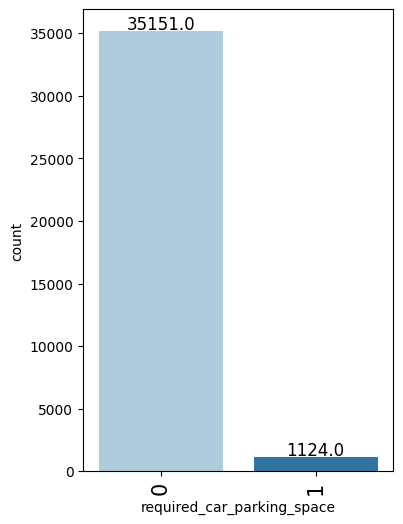

In [20]:
# Check required_car_parking_space
labeled_barplot(df, 'required_car_parking_space')

- The majority of the bookings did not require a car parking space.

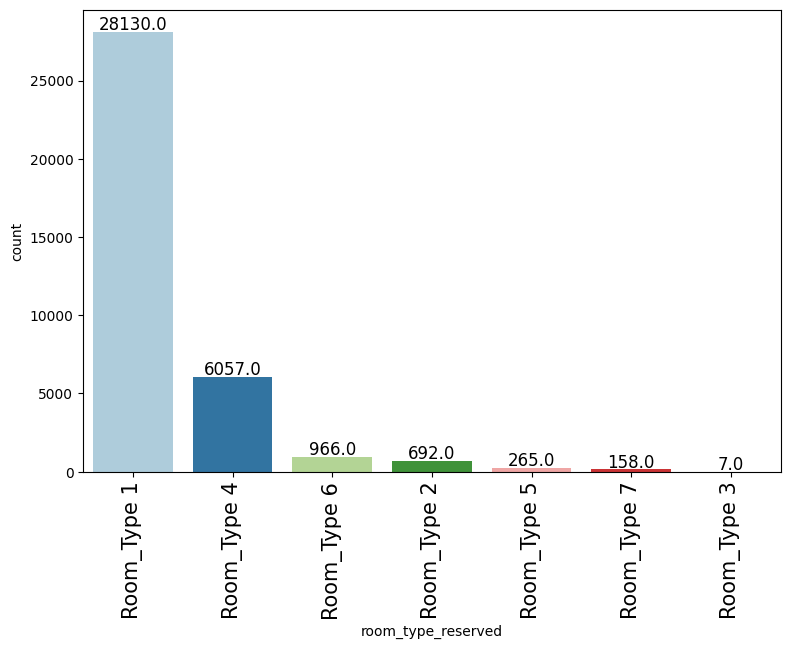

In [21]:
# Check room_type_reserved
labeled_barplot(df, 'room_type_reserved')

- Room type 1 was reserved the most among all the bookings. Room type 4 was reserved the second most.

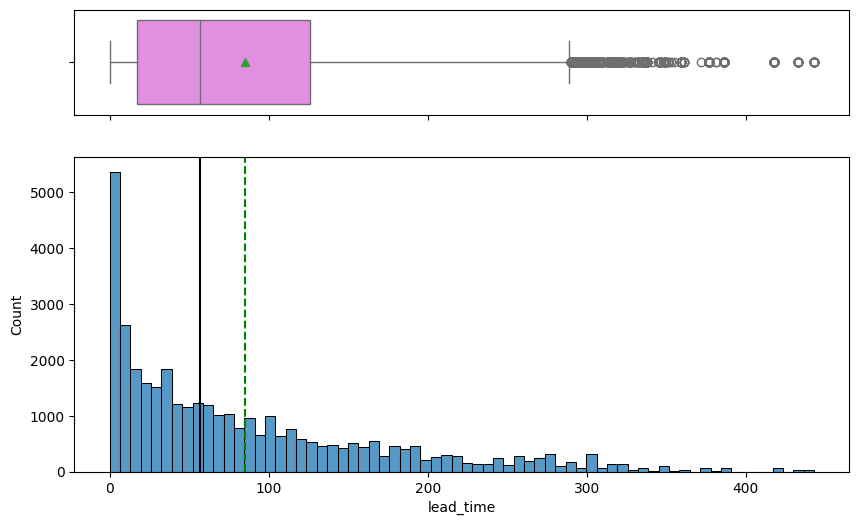

In [22]:
# Check lead_time
histogram_boxplot(df, 'lead_time')

- The distribution of lead time is right-skewed.
- The median lead time is about 55 days and the mean lead time is about 90 days.

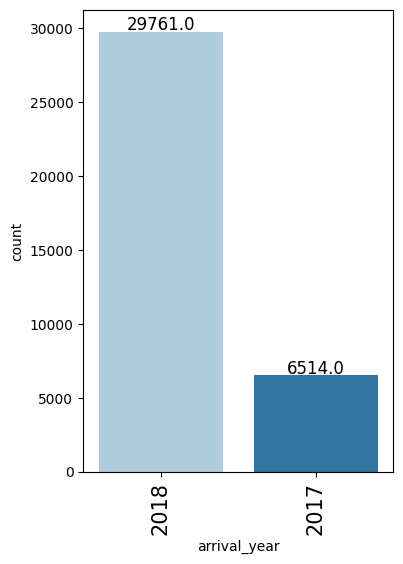

In [23]:
# Check arrival_year
labeled_barplot(df, 'arrival_year')

- More bookings are in the year 2018 than 2017.

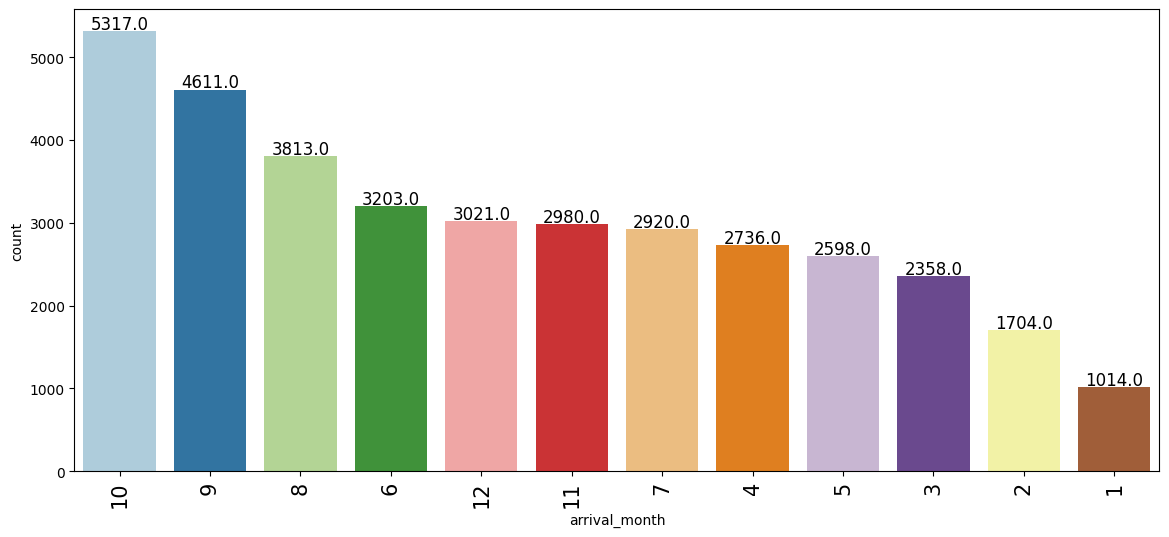

In [24]:
# Check arrival_month
labeled_barplot(df, 'arrival_month')

- October has the most bookings, while January has the least bookings.

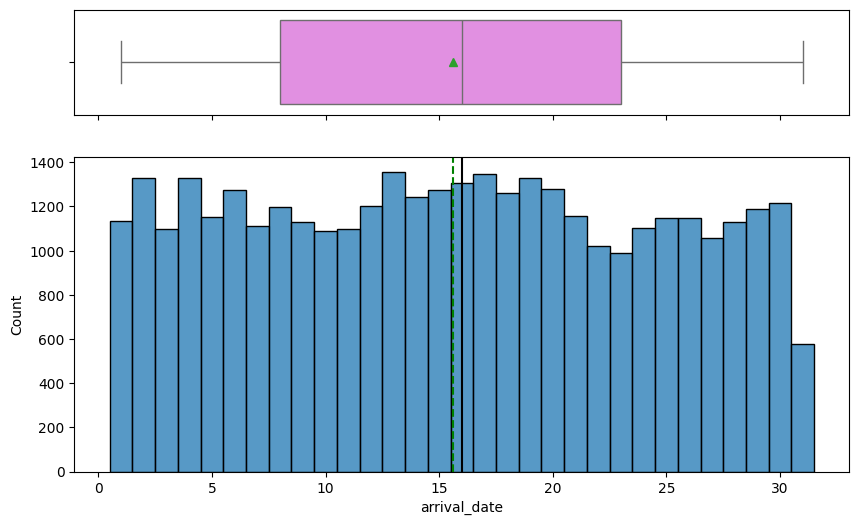

In [25]:
# Check arrival_date
histogram_boxplot(df, 'arrival_date', bins=list(np.arange(0.5,32.5,1)))

- The bookings for the arrival date in the middle of the months were slightly more than the number of bookings with arrival date in the early of the months and end of the months.

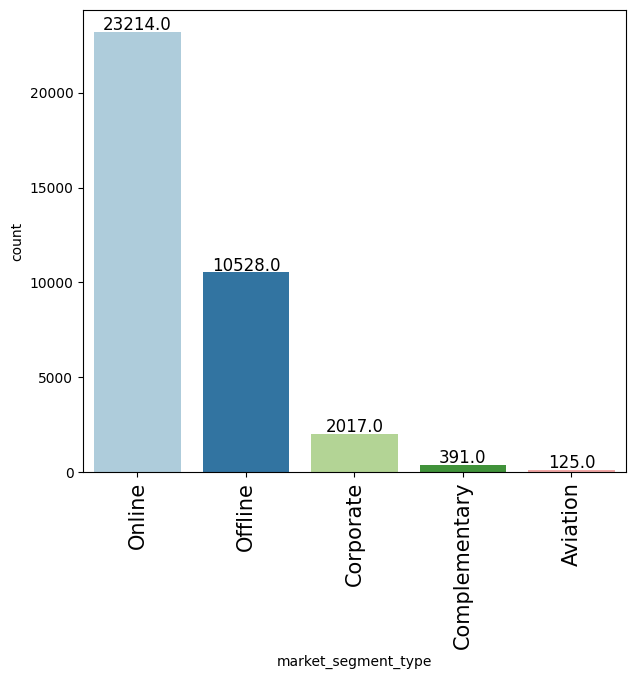

In [26]:
# Check market_segment_type
labeled_barplot(df, 'market_segment_type')

- Most bookings were booked online. Offline booking ranks the second.

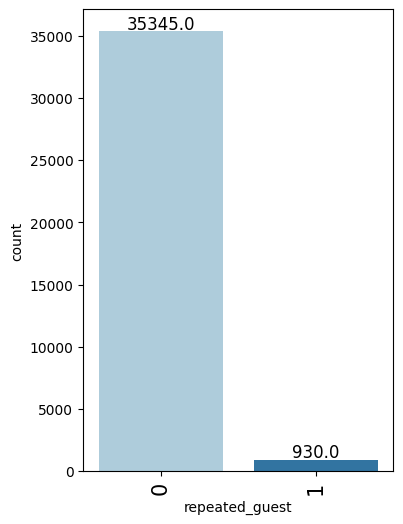

In [27]:
# Check repeated_guest
labeled_barplot(df, 'repeated_guest')

- The number of repeated guest is very low in the dataset.

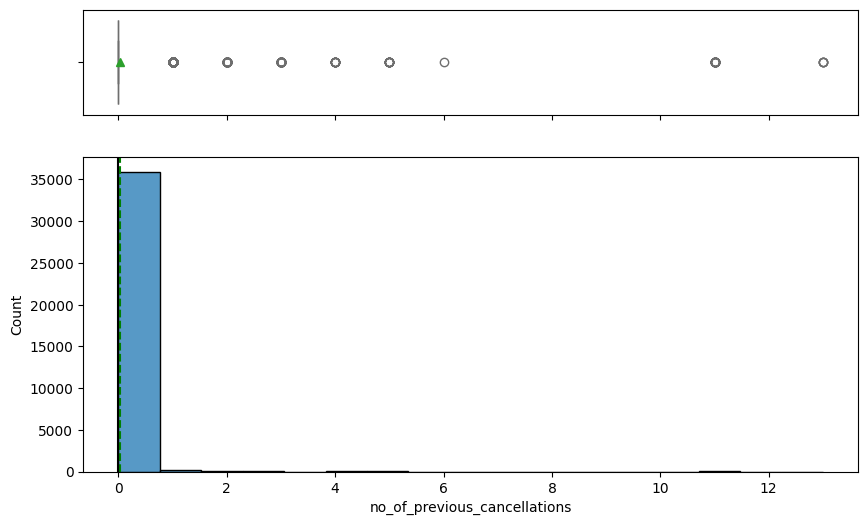

In [28]:
# Check no_of_previous_cancellations
histogram_boxplot(df, 'no_of_previous_cancellations')

- Most of the bookings do not have records of previous cancellations.
- There are a few outliers of data with more than 10 previous cancellations.

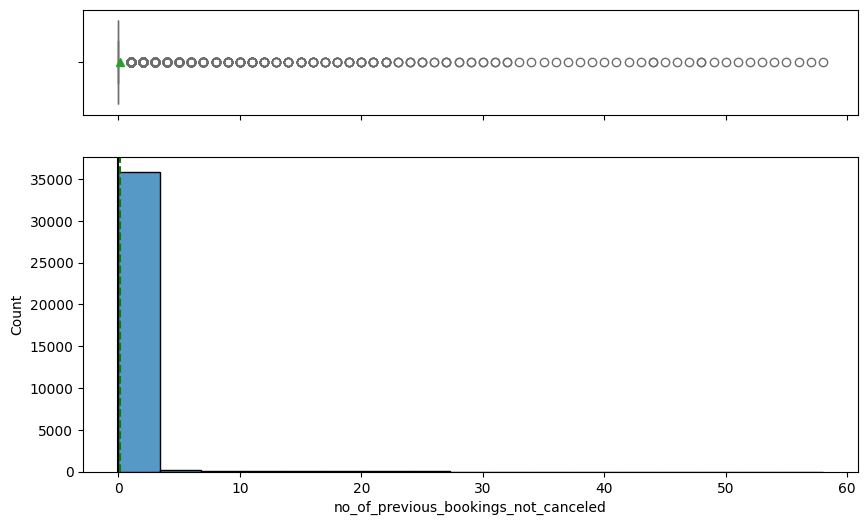

In [29]:
# Check no_of_previous_bookings_not_canceled
histogram_boxplot(df, 'no_of_previous_bookings_not_canceled')

- The number of previous bookings not canceled by the customer prior to the current booking is dominated by 0.

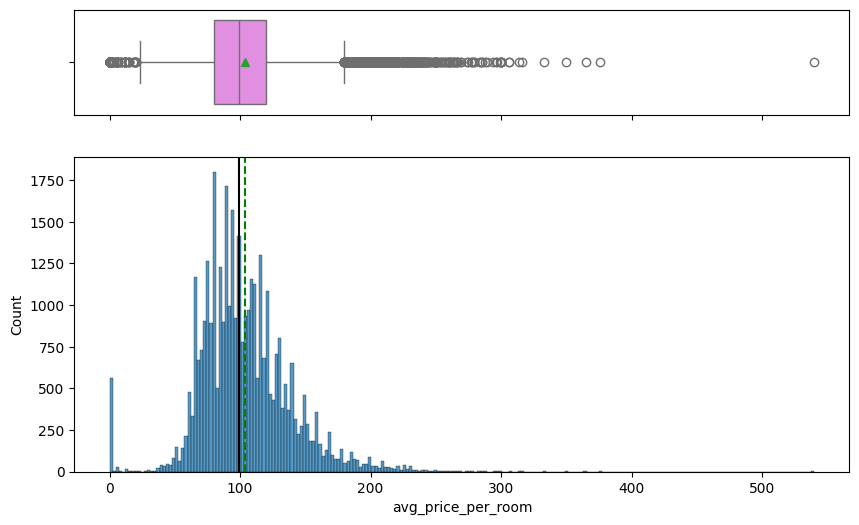

In [30]:
# Check avg_price_per_room
histogram_boxplot(df, 'avg_price_per_room')

- The distribution of averaged room price is slightly right-skewed.
- The median and mean averaged room price are around 100 euros.
- There are a number of data with nearly 0 room price in the dataset. This needs further check later.

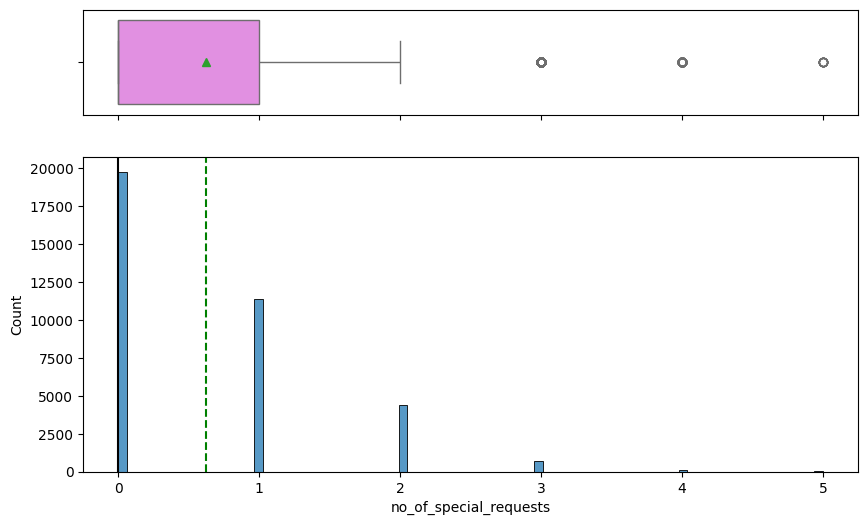

In [31]:
# Check no_of_special_requests
histogram_boxplot(df, 'no_of_special_requests')

- Most bookings did not have special requests.
- The most special request is 5 among all the bookings.

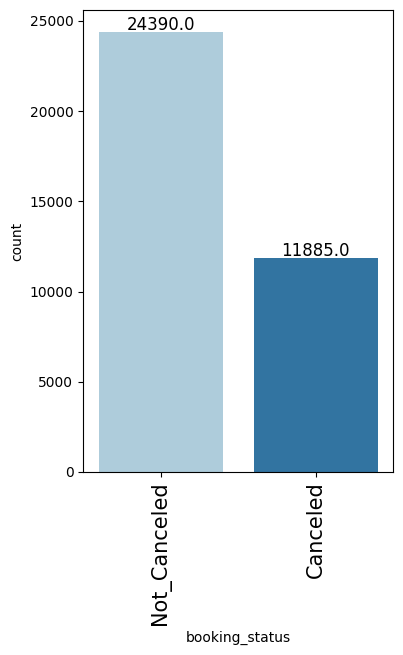

In [32]:
#Check booking_status
labeled_barplot(df, 'booking_status')

- The number of bookings that were not canceled is more than twice than the number of bookings that were canceled.

# Bivariate Analysis

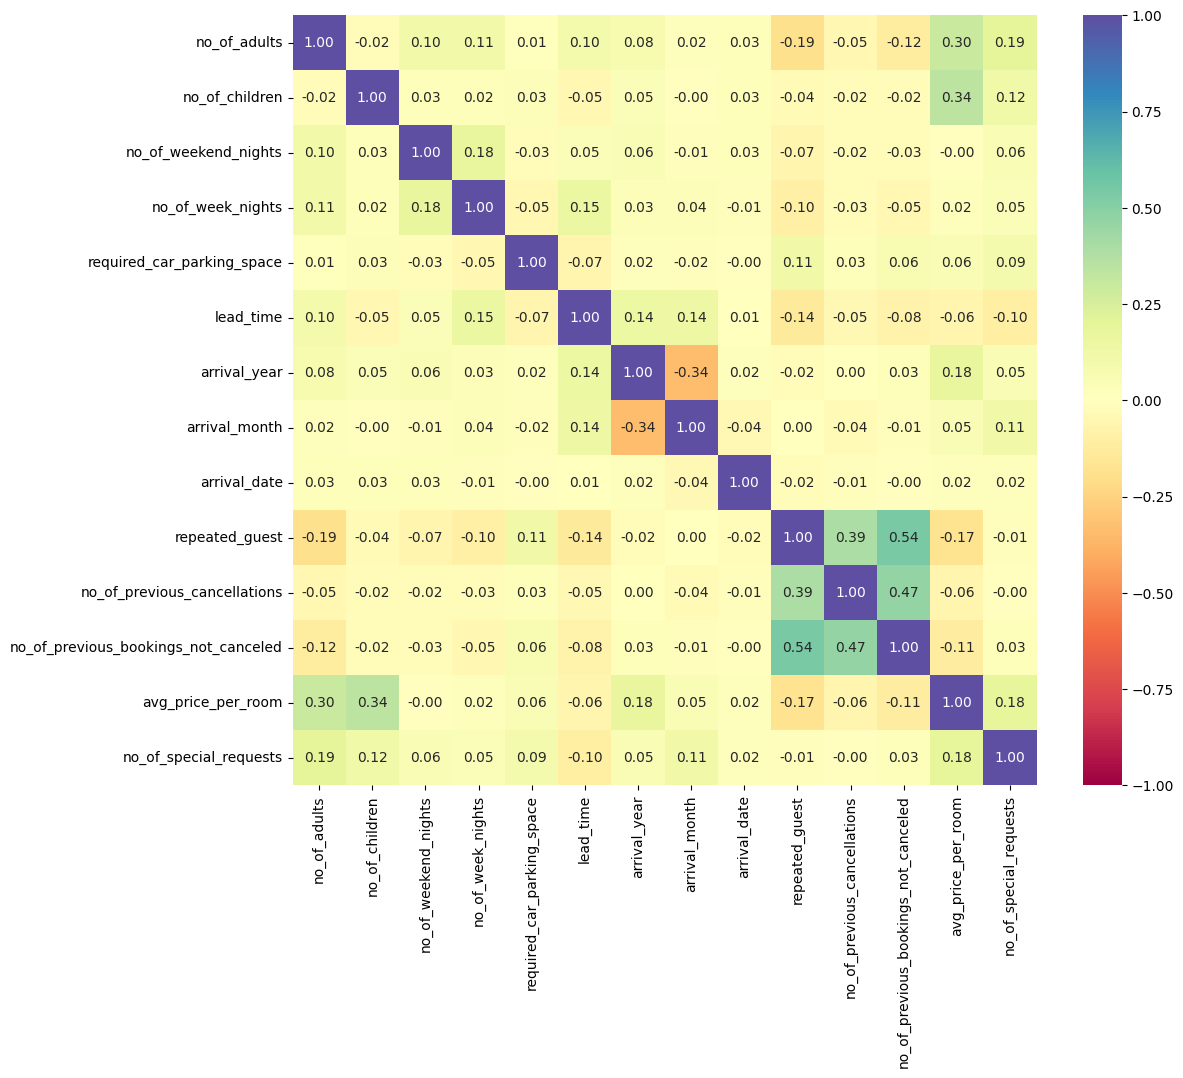

In [33]:
# Check the correlations between variables
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='Spectral');

- There are not strong correlations between any two variables in the datasets, except for the repeated guest and number of prevous bookings not canceled.

In [34]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [35]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Number of adults VS booking status

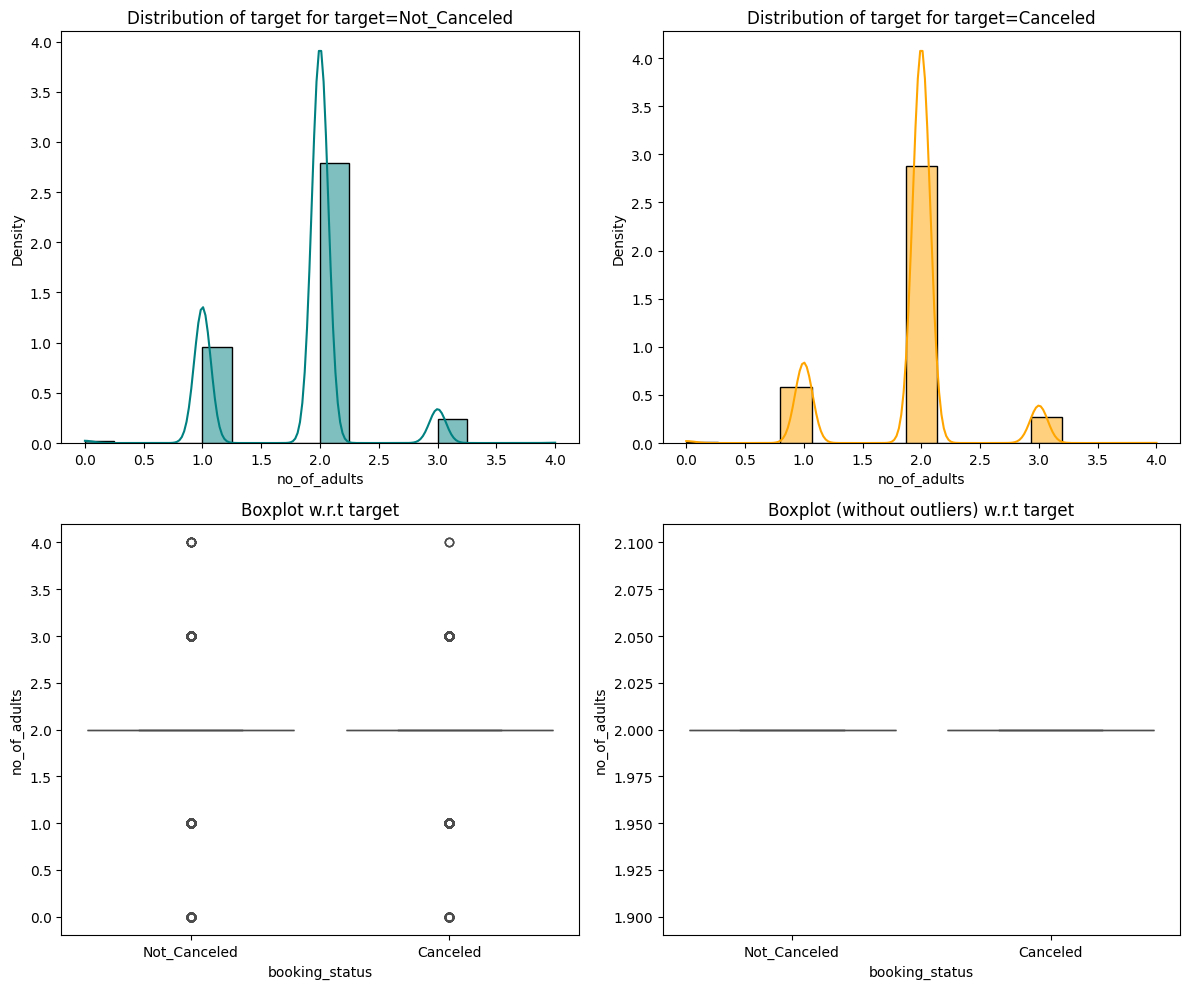

In [36]:
distribution_plot_wrt_target(df, "no_of_adults", "booking_status")

- The number of adults does not differ significantly between canceled and not canceled bookings.

### Number of children VS booking status

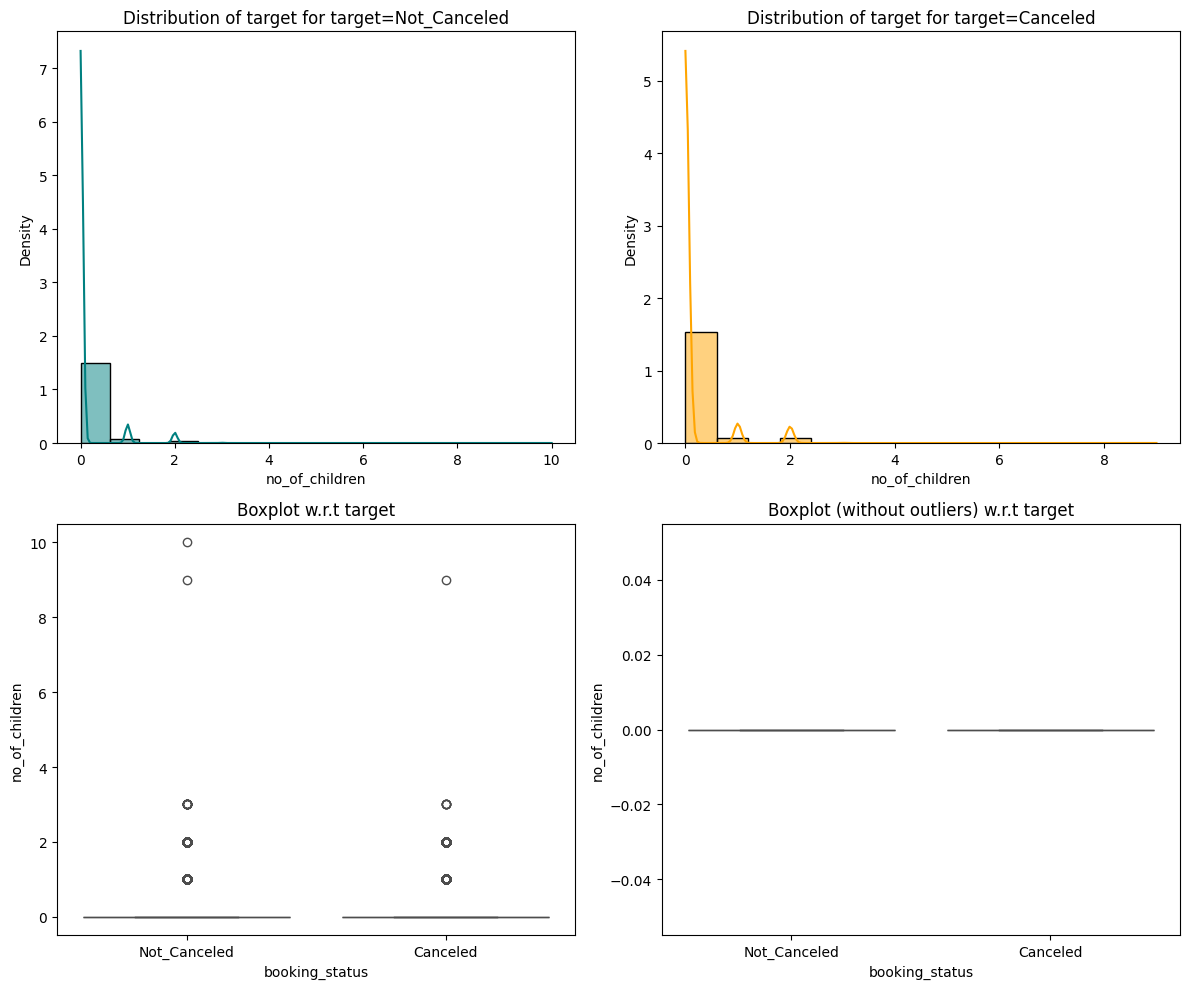

In [37]:
distribution_plot_wrt_target(df, "no_of_children", "booking_status")

- The number of children does not differ significantly between canceled and not canceled bookings.

### Number of weekend nights VS booking status

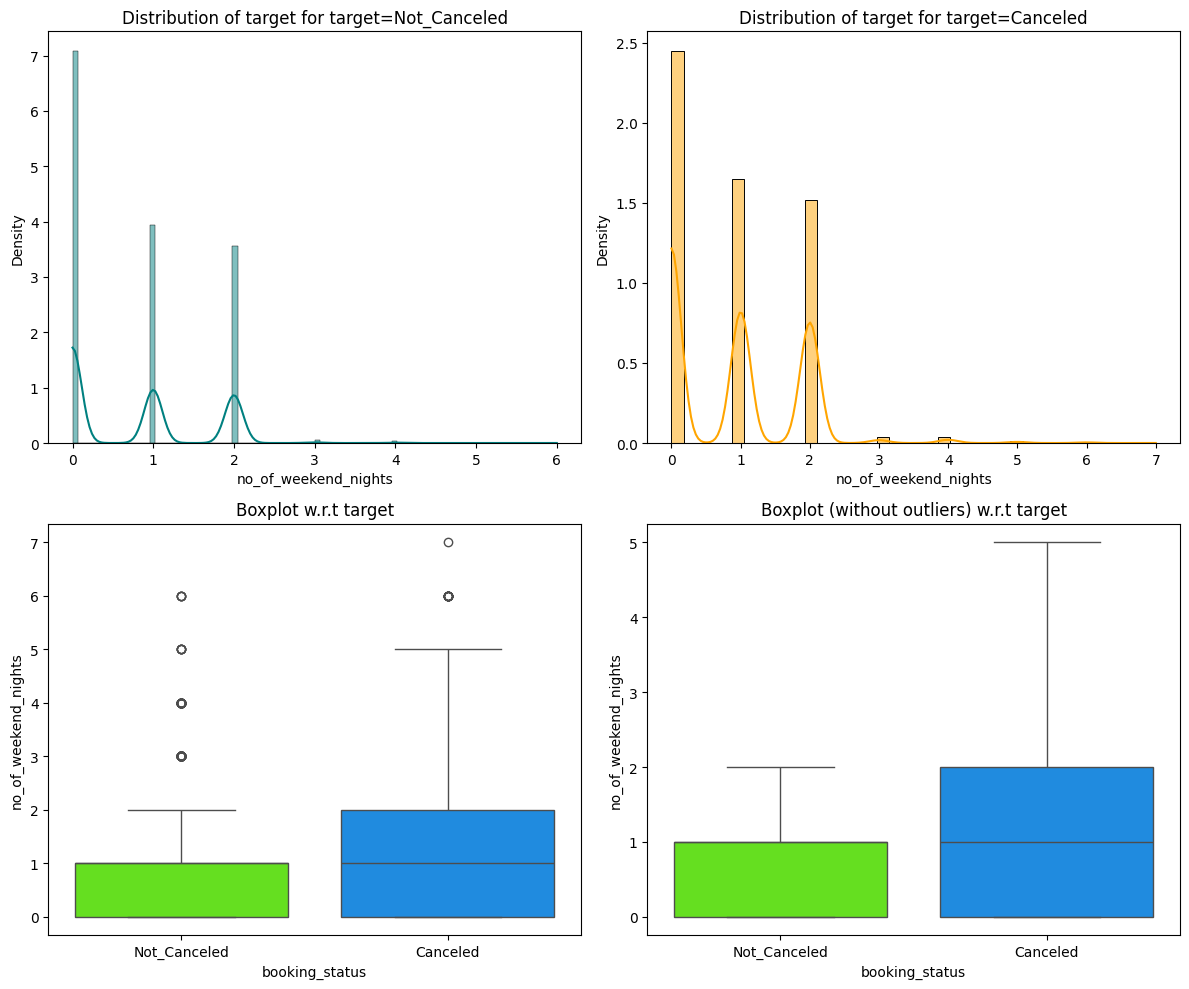

In [38]:
distribution_plot_wrt_target(df, "no_of_weekend_nights", "booking_status")

The 75% percentile of number of weekend nights is longer for canceled bookings than bookings that were not canceled.

### Number of weekday nights VS booking status

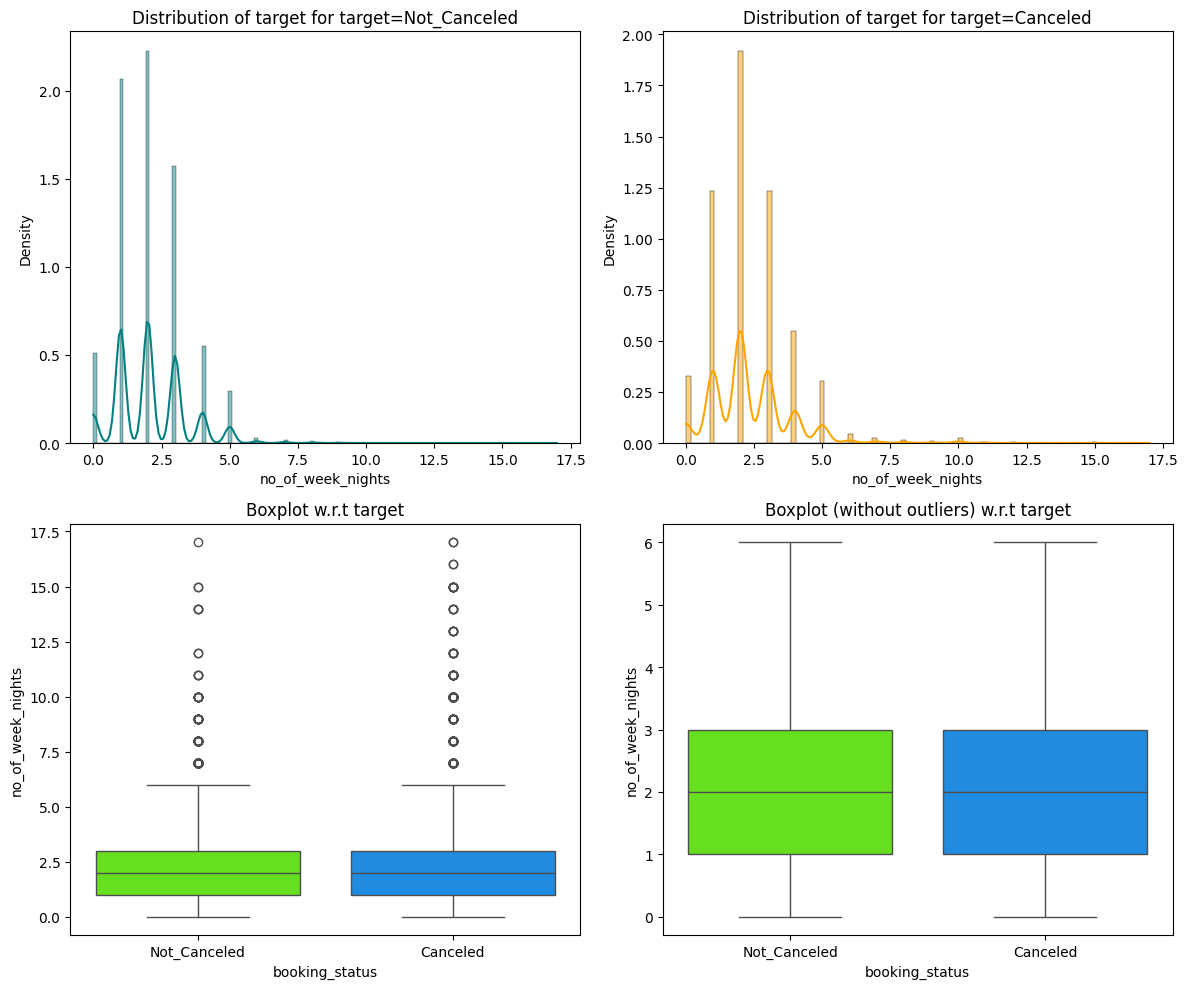

In [39]:
distribution_plot_wrt_target(df, "no_of_week_nights", "booking_status")

- The number of weekday nights does not differ significantly between canceled and not canceled bookings.

### Lead time VS booking status

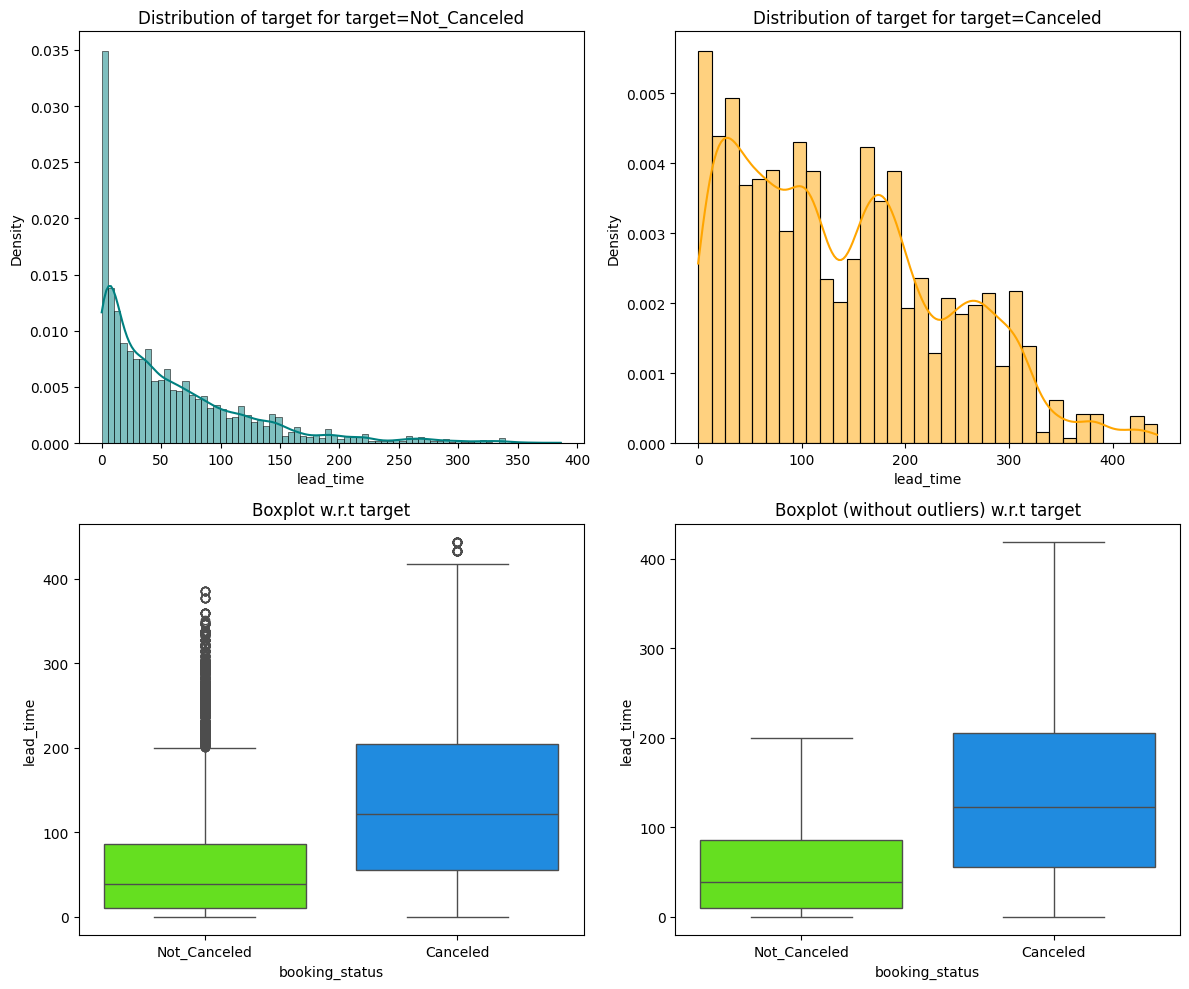

In [40]:
distribution_plot_wrt_target(df, "lead_time", "booking_status")

- The distribution of lead time is right-skewed for both canceled and not canceled bookings.
- The 25% percentile, median, and 75% percentile lead time for bookings not canceled is shorter than canceled bookings.

### no_of_previous_cancellations VS booking status

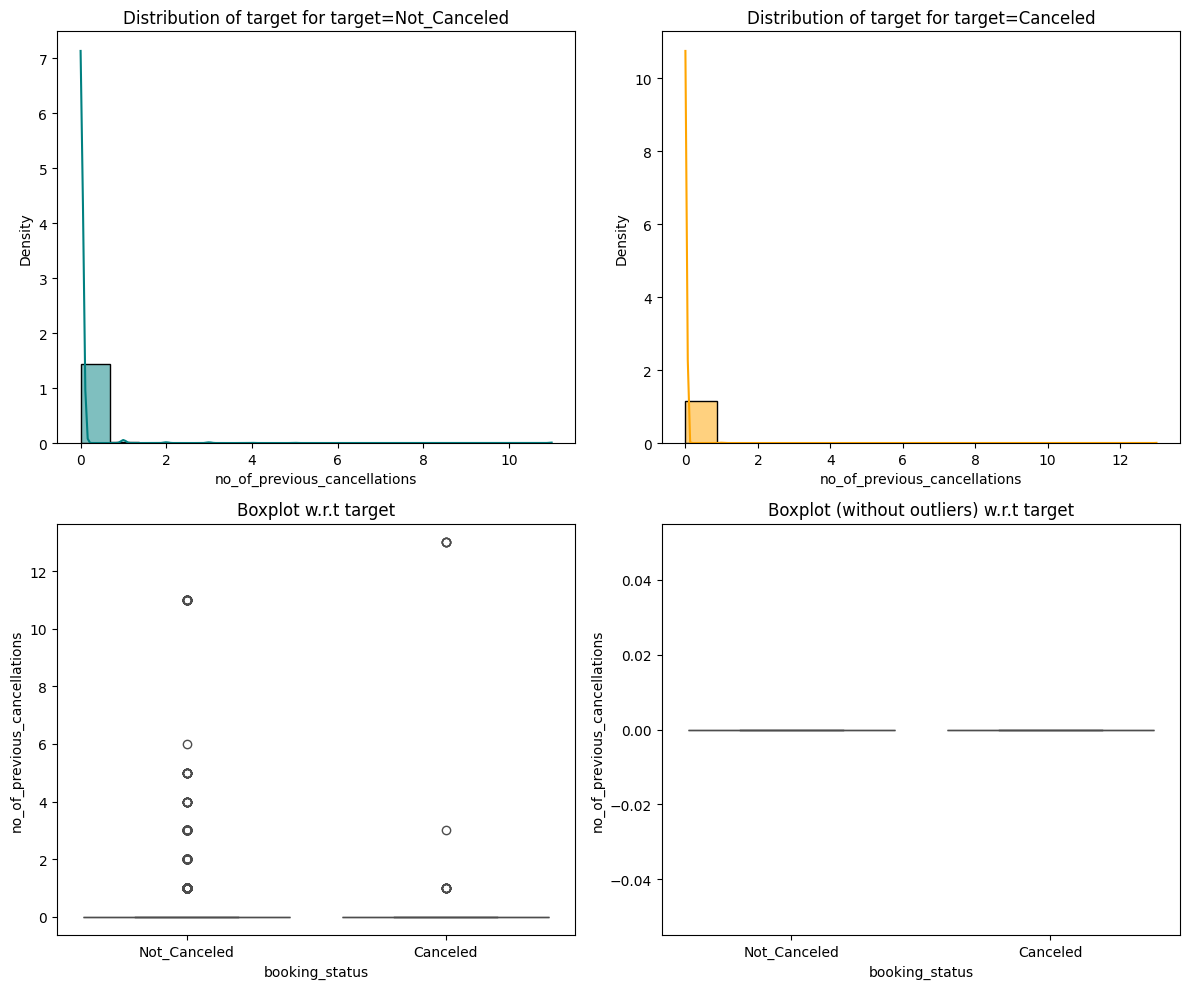

In [41]:
distribution_plot_wrt_target(df, "no_of_previous_cancellations", "booking_status")

- The number of previous cancellations does not differ significantly between canceled and not canceled bookings.

### no_of_previous_bookings_not_canceled VS booking status

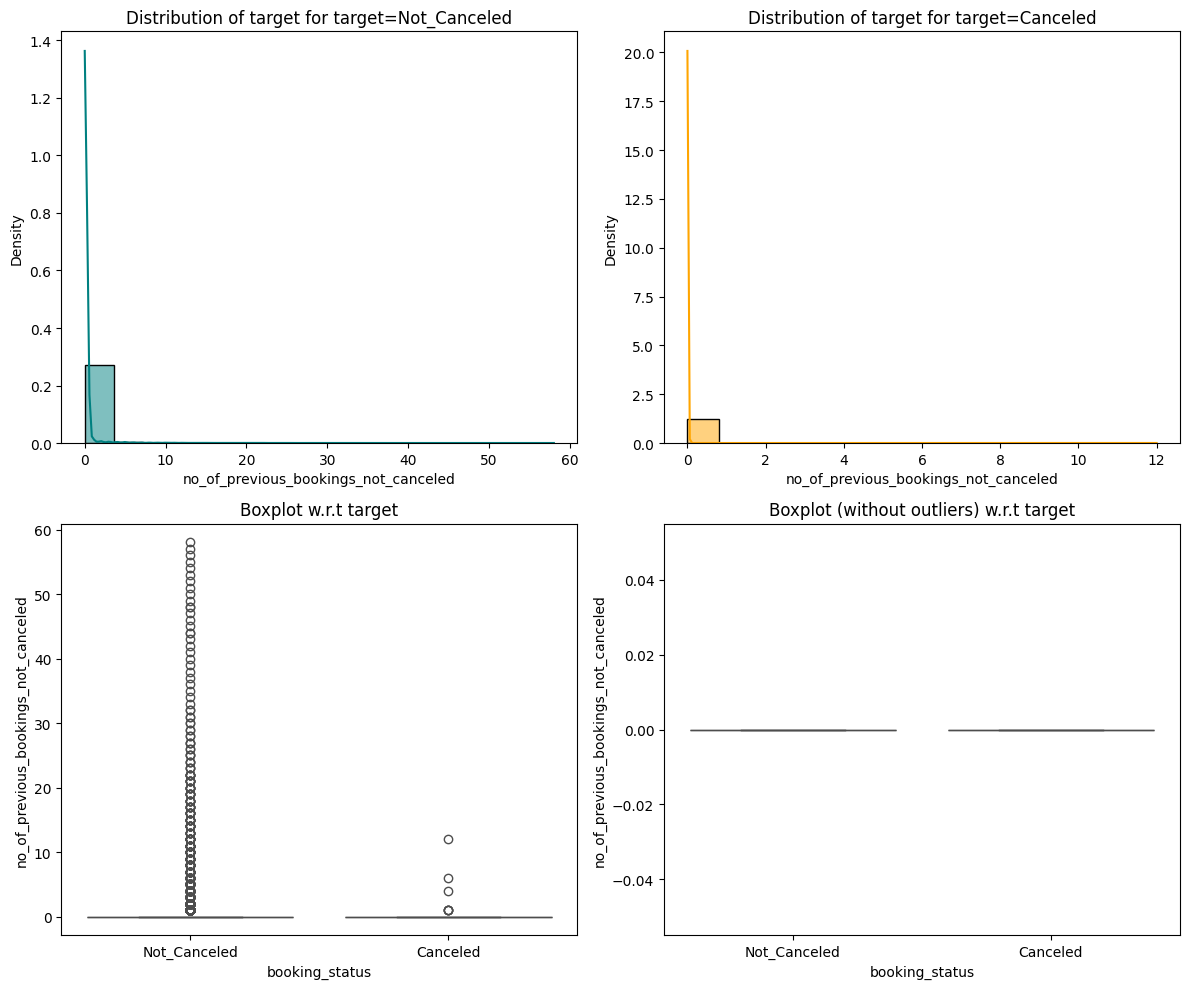

In [42]:
distribution_plot_wrt_target(df, "no_of_previous_bookings_not_canceled", "booking_status")

- The number of previous bookings not canceled does not differ significantly between canceled and not canceled bookings.

### avg_price_per_room VS booking status

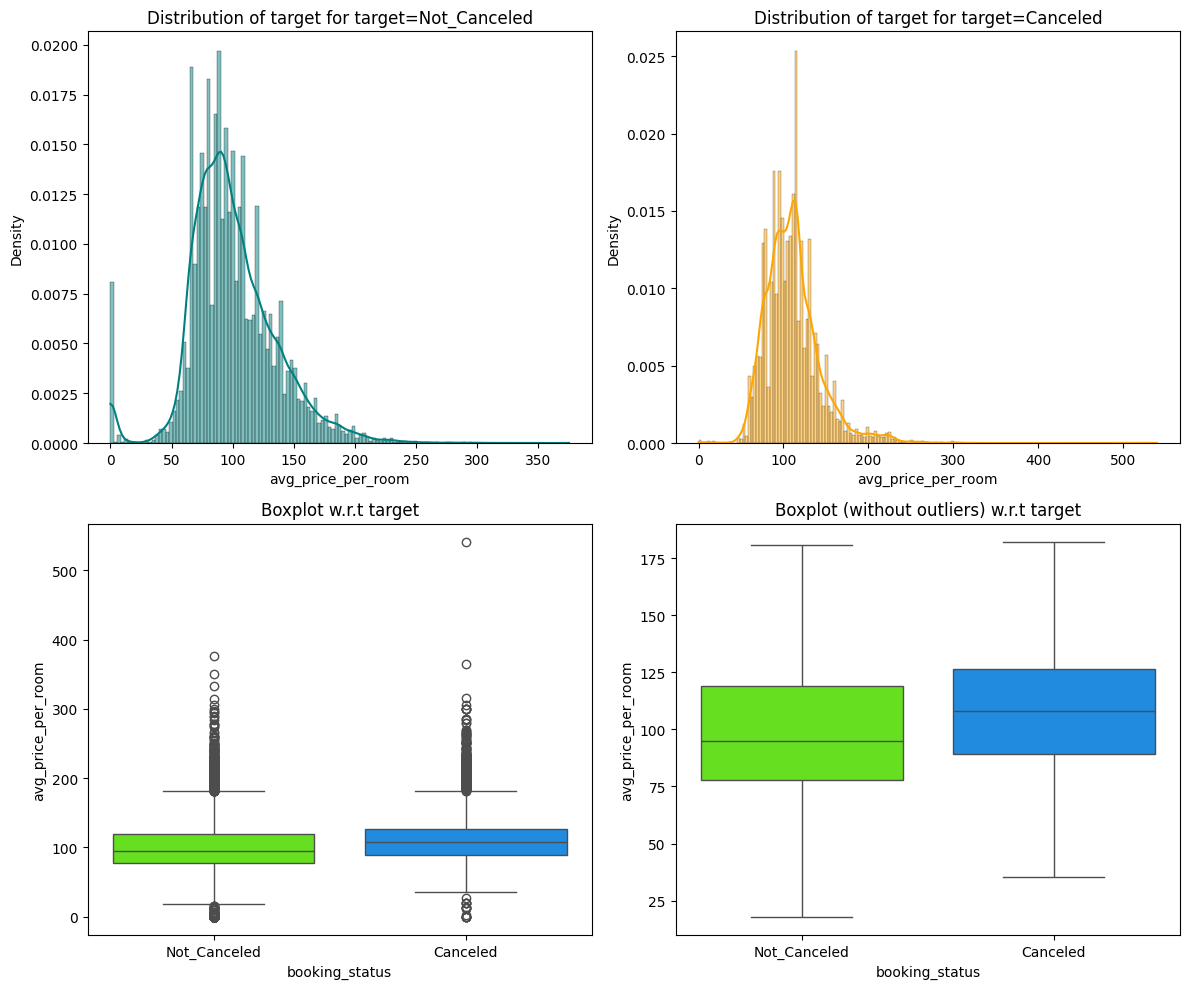

In [43]:
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")

- The 25% percentile, median, and 75% percentile of averaged price per room is higher for canceled bookings than bookings not canceled.
- There are a number of data with nearly 0 averaged price for bookings not canceled in the dataset.

### type_of_meal_plan VS booking status

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11885         24390  36275
Meal Plan 1            8679         19156  27835
Not Selected           1699          3431   5130
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
------------------------------------------------------------------------------------------------------------------------


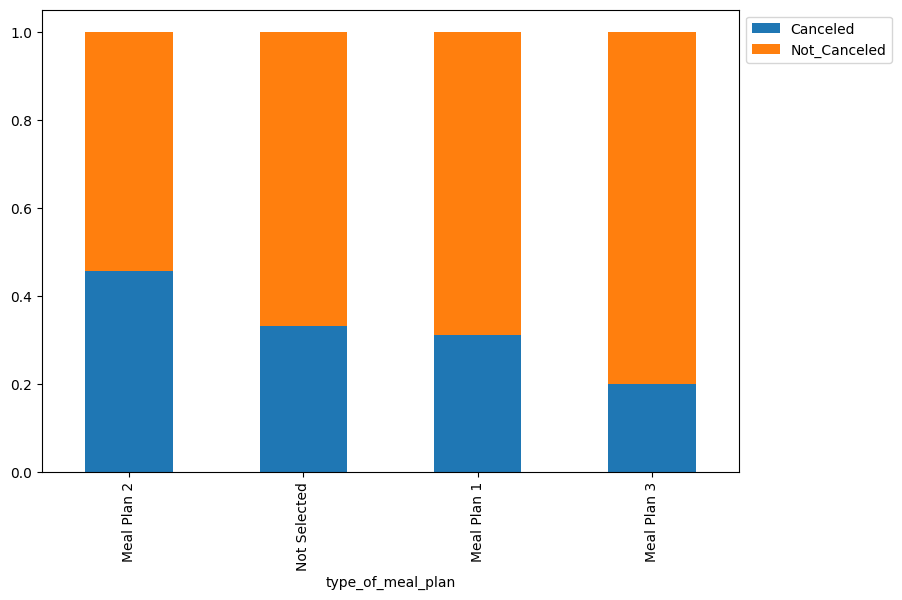

In [44]:
stacked_barplot(df, "type_of_meal_plan", "booking_status")

- Among all canceled bookings, bookings selected meal plan 1 were canceled the most in terms of the total number of bookings.
- Among all cenceled bookings, bookings selected meal plan 2 were canceled the most in terms of the cancel fraction.

 ### required_car_parking_space VS booking status

booking_status              Canceled  Not_Canceled    All
required_car_parking_space                               
All                            11885         24390  36275
0                              11771         23380  35151
1                                114          1010   1124
------------------------------------------------------------------------------------------------------------------------


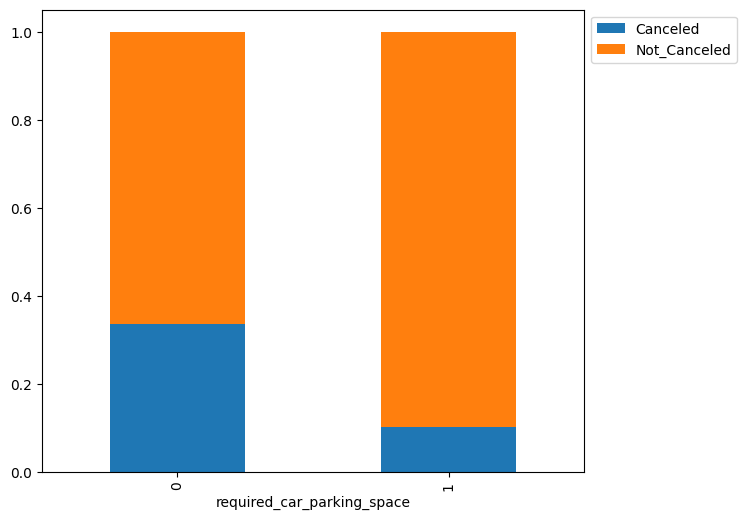

In [45]:
stacked_barplot(df, "required_car_parking_space", "booking_status")

- The ratio of canceled booking to not canceled booking is larger for bookings that did not require a car parking space than bookings required a car parking space.

### room_type_reserved VS booking status

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    11885         24390  36275
Room_Type 1             9072         19058  28130
Room_Type 4             2069          3988   6057
Room_Type 6              406           560    966
Room_Type 2              228           464    692
Room_Type 5               72           193    265
Room_Type 7               36           122    158
Room_Type 3                2             5      7
------------------------------------------------------------------------------------------------------------------------


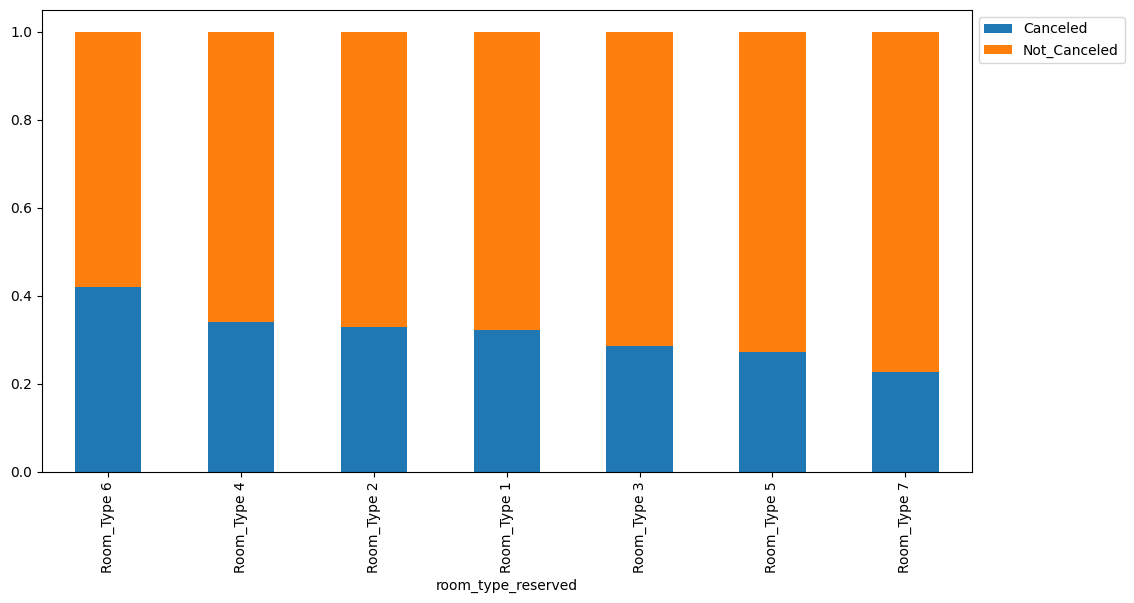

In [46]:
stacked_barplot(df, "room_type_reserved", "booking_status")

- The ratio of canceled booking to not canceled booking is the largest for room type 6 reservation, and the least for room type 7 reservation.

### arrival_year VS booking status

booking_status  Canceled  Not_Canceled    All
arrival_year                                 
All                11885         24390  36275
2018               10924         18837  29761
2017                 961          5553   6514
------------------------------------------------------------------------------------------------------------------------


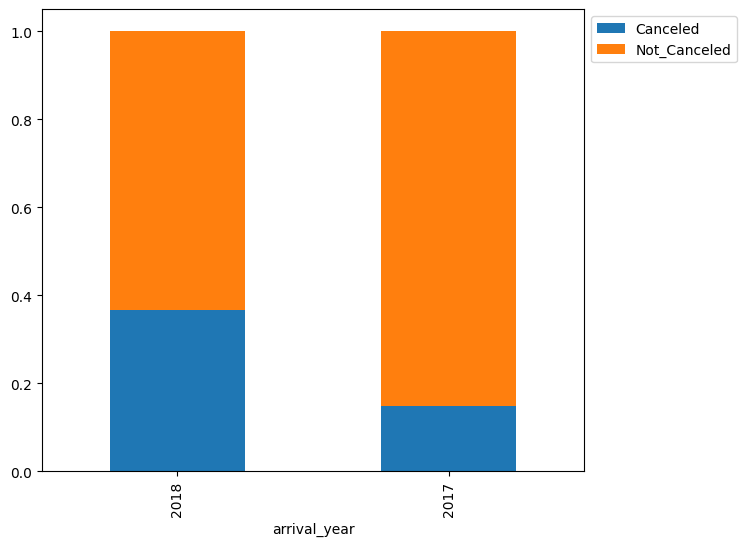

In [47]:
stacked_barplot(df, "arrival_year", "booking_status")

- The ratio of canceled booking to not canceled booking is larger for 2018 bookings than 2017 bookings.

### arrival_month VS booking status

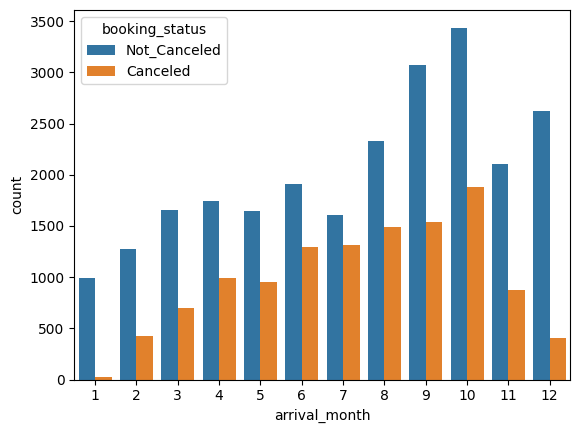

In [48]:
sns.countplot(df, x="arrival_month", hue="booking_status");

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


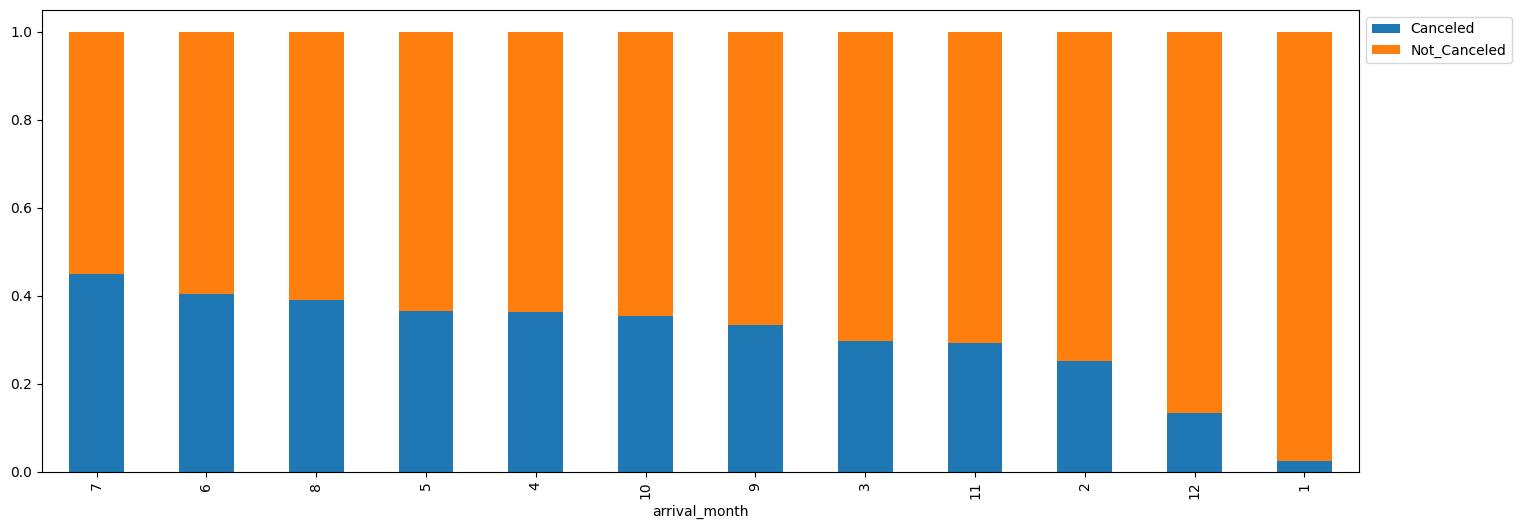

In [49]:
stacked_barplot(df, "arrival_month", "booking_status")

- The ratio of canceled booking to not canceled booking is the larger for summer bookings than winter bookings.

### arrival_date VS booking status

booking_status  Canceled  Not_Canceled    All
arrival_date                                 
All                11885         24390  36275
15                   538           735   1273
4                    474           853   1327
16                   473           833   1306
30                   465           751   1216
1                    465           668   1133
12                   460           744   1204
17                   448           897   1345
6                    444           829   1273
26                   425           721   1146
19                   413           914   1327
20                   413           868   1281
13                   408           950   1358
28                   405           724   1129
3                    403           695   1098
25                   395           751   1146
21                   376           782   1158
24                   372           731   1103
18                   366           894   1260
7                    364          

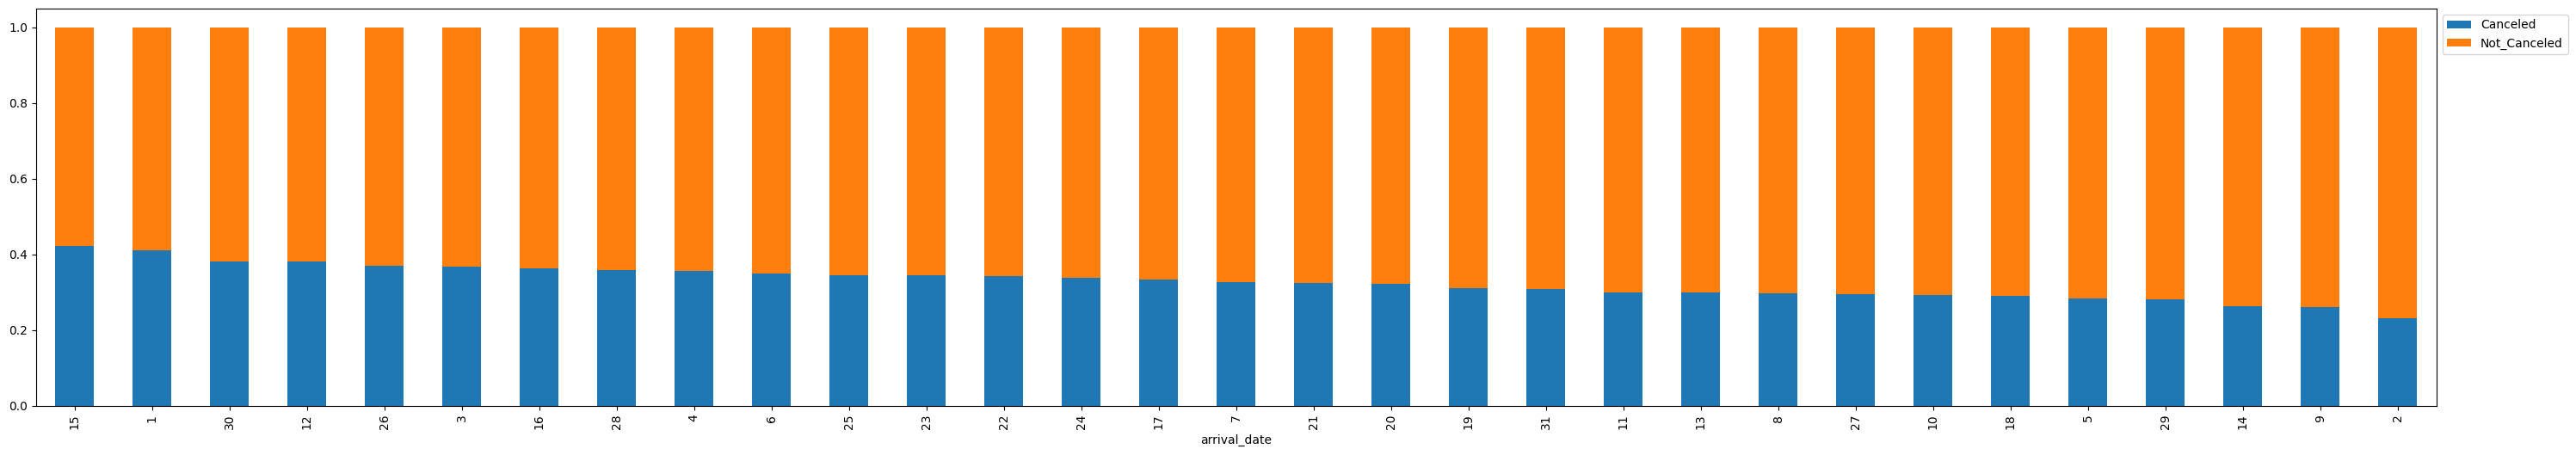

In [50]:
stacked_barplot(df, "arrival_date", "booking_status")

- The ratio of canceled booking to not canceled booking is slightly larger for arrival dates on 15th, 1st, and 30th of the month.

### market_segment_type VS booking status

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


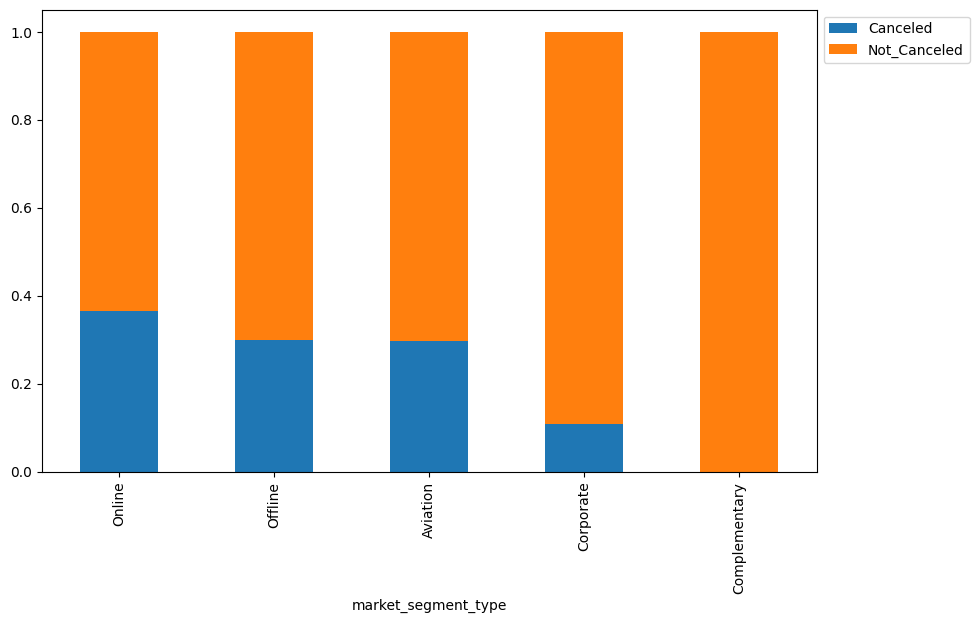

In [51]:
stacked_barplot(df, "market_segment_type", "booking_status")

- The online bookings were canceled the most in terms of booking number and the cancellation fraction.
- Complementary bookings had zero cancellation.

### repeated_guest VS booking status

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


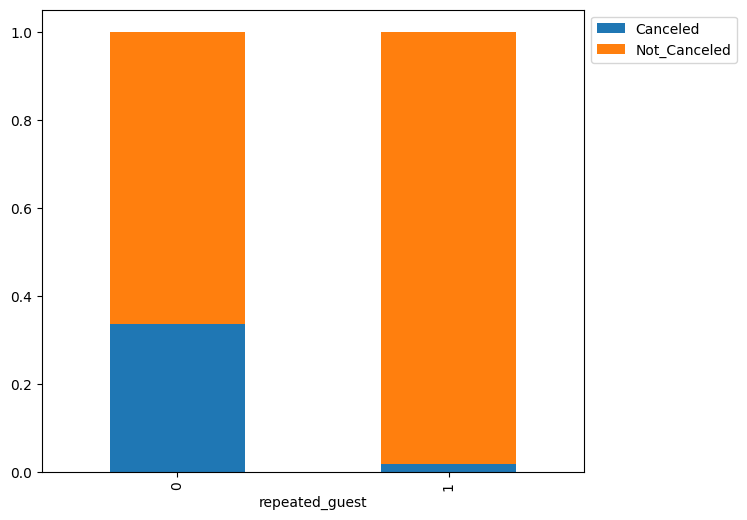

In [52]:
stacked_barplot(df, "repeated_guest", "booking_status")

- The ratio of canceled booking to not canceled booking is larger for non-repeated guests, although the number of repeated guest is low in the dataset.

### no_of_special_requests VS booking status

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


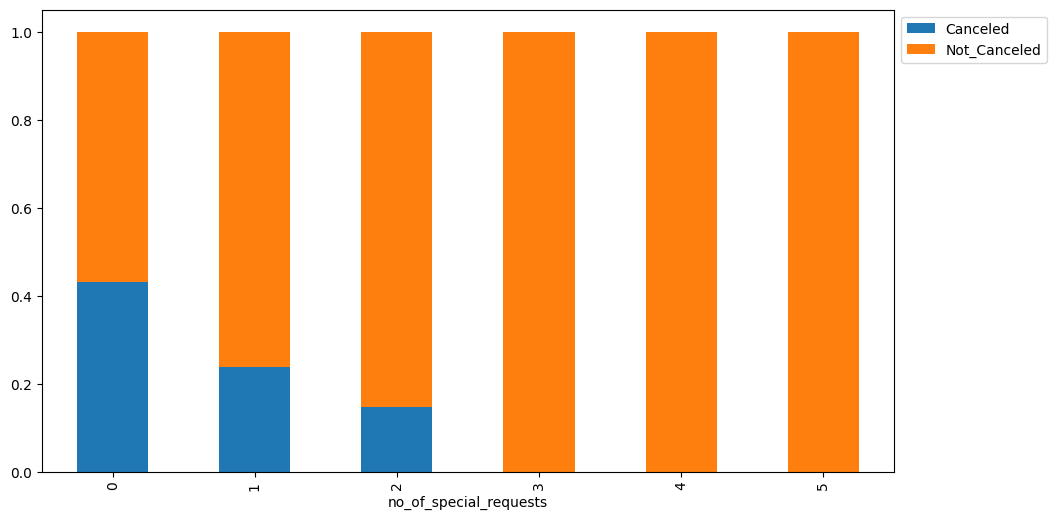

In [53]:
stacked_barplot(df, "no_of_special_requests", "booking_status")

- The ratio of canceled booking to non-canceled booking decreases with increasing number of special requests.

### avg_price_per_room VS type_of_meal_plan

<Figure size 600x400 with 0 Axes>

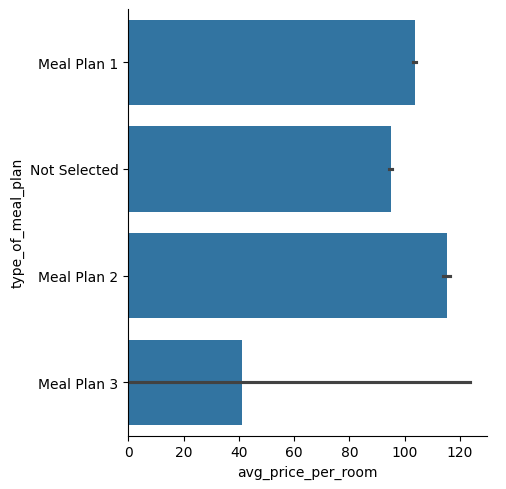

<Figure size 600x400 with 0 Axes>

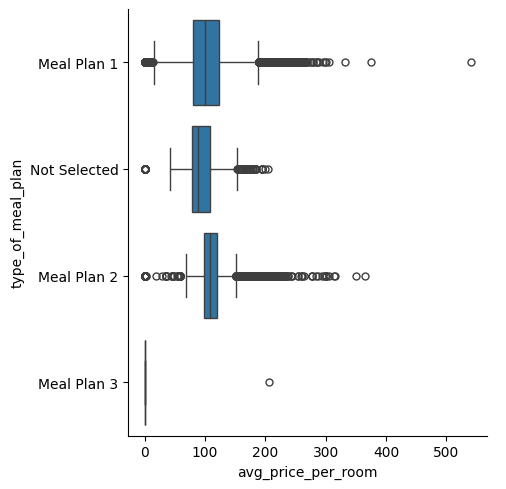

In [54]:
plt.figure(figsize=(6,4))
sns.catplot(df, y='type_of_meal_plan', x='avg_price_per_room', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(df, y='type_of_meal_plan', x='avg_price_per_room', kind='box');

- Meal plan 2 has the highest mean, 25% percentile, median, and 75% percentile average price per room compared to other meal plans.
- Meal plan 3 has the lowest mean, 25% percentile, median, and 75% percentile price.

### avg_price_per_room VS required_car_parking_space

<Figure size 600x400 with 0 Axes>

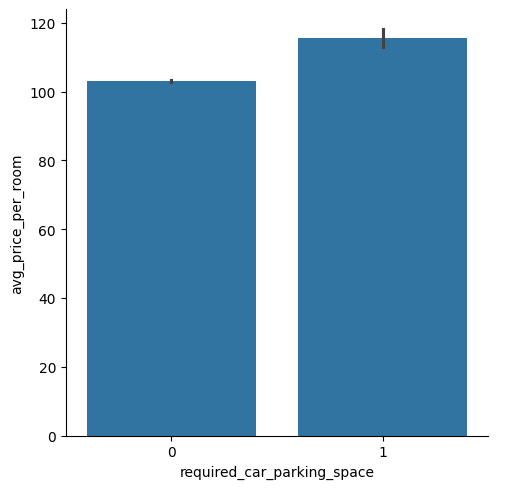

<Figure size 600x400 with 0 Axes>

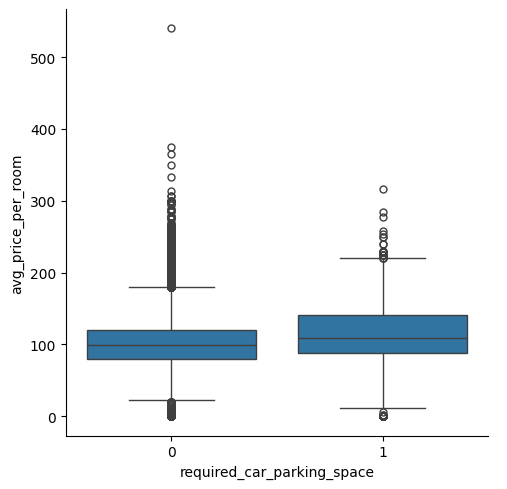

In [55]:
plt.figure(figsize=(6,4))
sns.catplot(df, x='required_car_parking_space', y='avg_price_per_room', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(df, x='required_car_parking_space', y='avg_price_per_room', kind='box');

- The average price for bookings required car parking space is higher than bookings without car parking space.

### arrival_year VS avg_price_per_room

<Figure size 600x400 with 0 Axes>

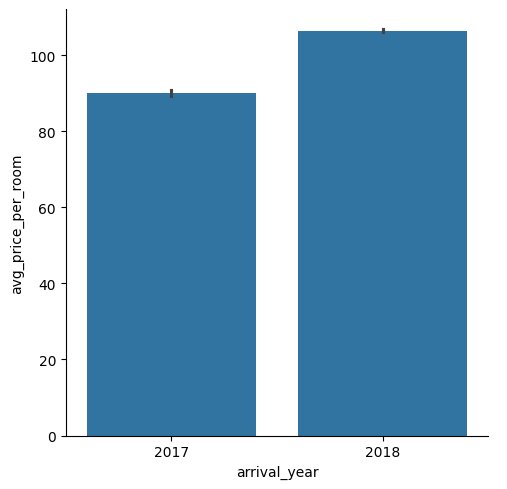

<Figure size 600x400 with 0 Axes>

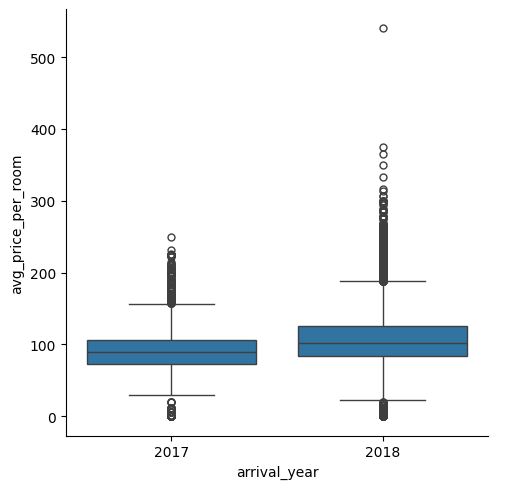

In [56]:
plt.figure(figsize=(6,4))
sns.catplot(df, x='arrival_year', y='avg_price_per_room', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(df, x='arrival_year', y='avg_price_per_room', kind='box');

- The average price is higher for bookings in 2018 than 2017.

### arrival_month VS avg_price_per_room

<Figure size 600x400 with 0 Axes>

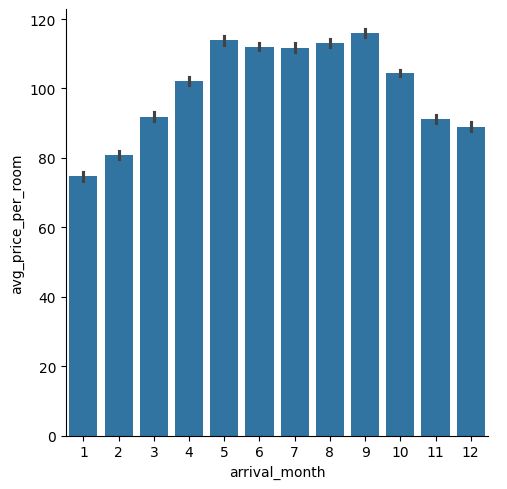

<Figure size 600x400 with 0 Axes>

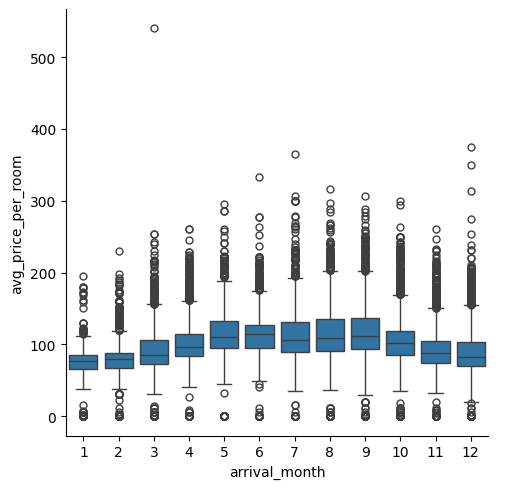

In [57]:
plt.figure(figsize=(6,4))
sns.catplot(df, x='arrival_month', y='avg_price_per_room', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(df, x='arrival_month', y='avg_price_per_room', kind='box');

- The average price is higher for bookings in summer than in winter.
- The average price is lowest for bookings in January.

### arrival_date VS avg_price_per_room

<Figure size 600x400 with 0 Axes>

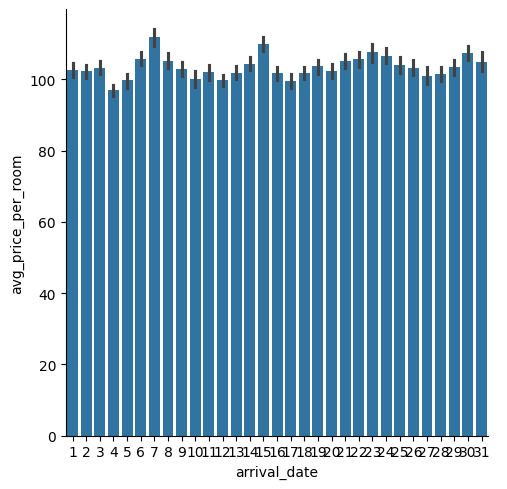

<Figure size 600x400 with 0 Axes>

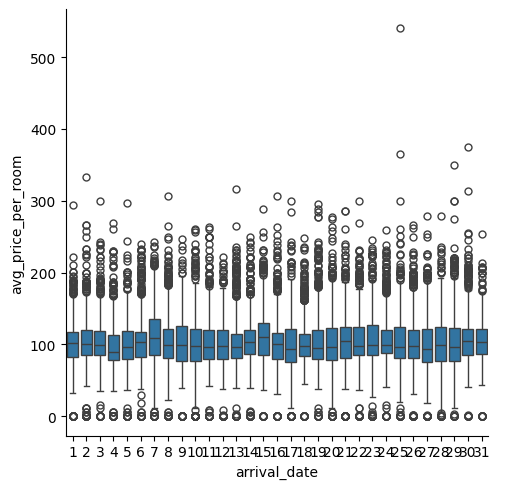

In [58]:
plt.figure(figsize=(6,4))
sns.catplot(df, x='arrival_date', y='avg_price_per_room', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(df, x='arrival_date', y='avg_price_per_room', kind='box');

- The room price varies for different dates in the month. 7th and 15th tend to have higher prices than other dates.

### avg_price_per_room VS room_type_reserved

<Figure size 600x400 with 0 Axes>

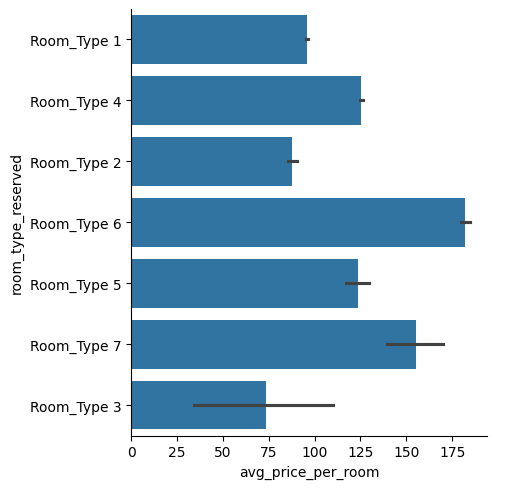

<Figure size 600x400 with 0 Axes>

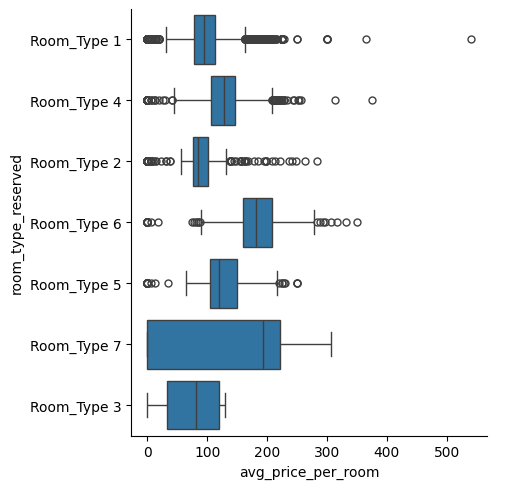

In [59]:
plt.figure(figsize=(6,4))
sns.catplot(df, y='room_type_reserved', x='avg_price_per_room', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(df, y='room_type_reserved', x='avg_price_per_room', kind='box');

- Type 6 room has the highest mean average price per room.
- Type 7 room has the largest interquartile range of average room price compared to other room types.
- Type 1 room price varies the most among all room types.

### market_segment_type VS avg_price_per_room

<Figure size 600x400 with 0 Axes>

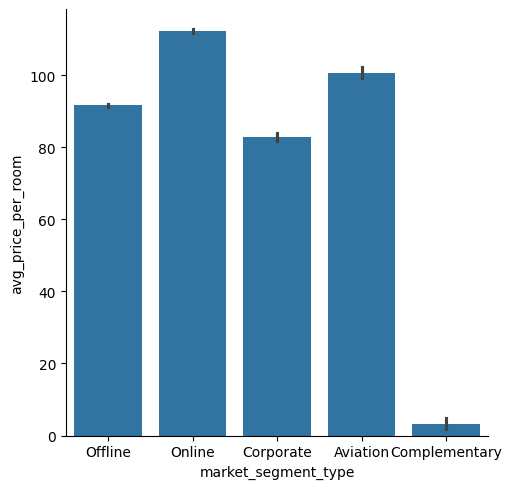

<Figure size 600x400 with 0 Axes>

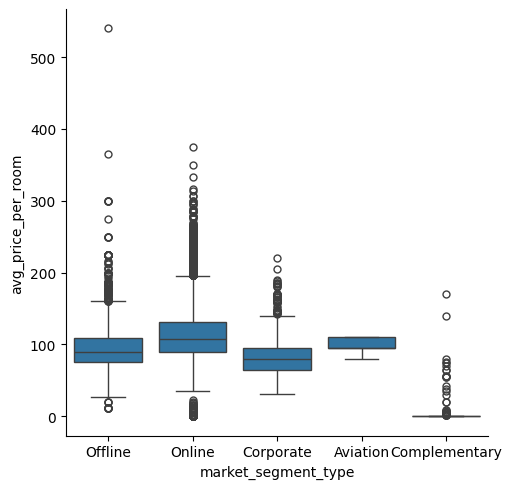

In [60]:
plt.figure(figsize=(6,4))
sns.catplot(df, x='market_segment_type', y='avg_price_per_room', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(df, x='market_segment_type', y='avg_price_per_room', kind='box');

- Online booking has the highest mean, median, and 75% percentile of average room price.
- Complementary booking has the lowest room price as expected, but it has a few outlier data.
- Corporate booking has the lowest room price other than complementary bookings among all market segment types, in terms of the mean, 25% percentile, median, and 75% percentile price.
- The room price from Aviation bookings ranks the second, in terms of the mean and 75% percentile price. It also has no outliers in the data.

### repeated_guest VS avg_price_per_room

<Figure size 600x400 with 0 Axes>

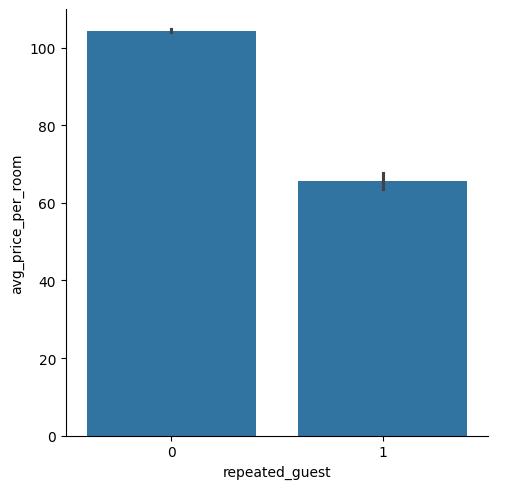

<Figure size 600x400 with 0 Axes>

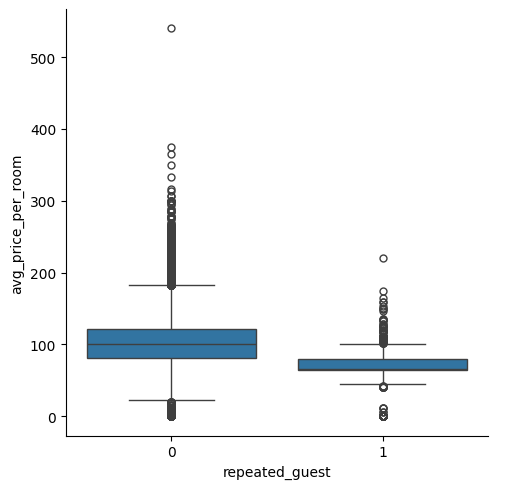

In [61]:
plt.figure(figsize=(6,4))
sns.catplot(df, x='repeated_guest', y='avg_price_per_room', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(df, x='repeated_guest', y='avg_price_per_room', kind='box');

- The average room price is higher for non-repeated guest than repeated guest.

### no_of_special_requests VS avg_price_per_room

<Figure size 600x400 with 0 Axes>

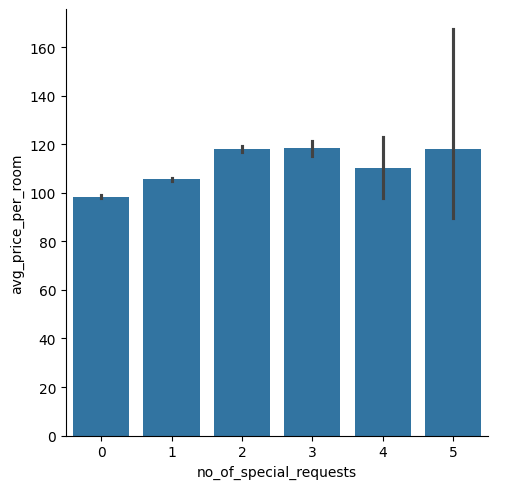

<Figure size 600x400 with 0 Axes>

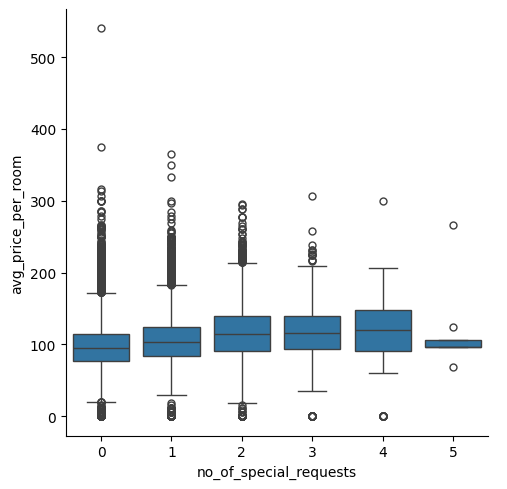

In [62]:
plt.figure(figsize=(6,4))
sns.catplot(df, x='no_of_special_requests', y='avg_price_per_room', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(df, x='no_of_special_requests', y='avg_price_per_room', kind='box');

- The median average room price increases for the number of special requests change from 0 to 4.
- The room price is lowest for bookings without any special request.

# Answers to questions

### 1. What are the busiest months in the hotel?

<Axes: xlabel='arrival_month', ylabel='count'>

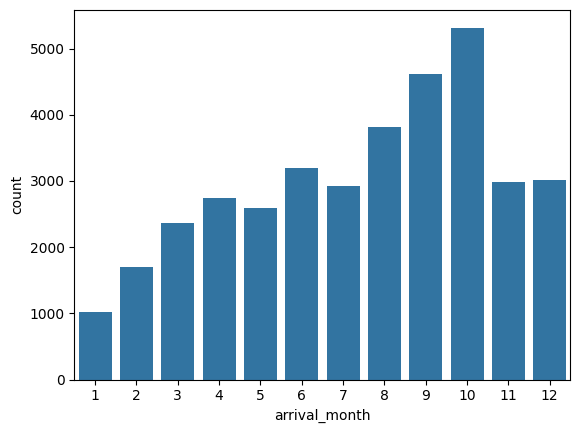

In [63]:
sns.countplot(df, x="arrival_month")

<Axes: xlabel='arrival_month', ylabel='count'>

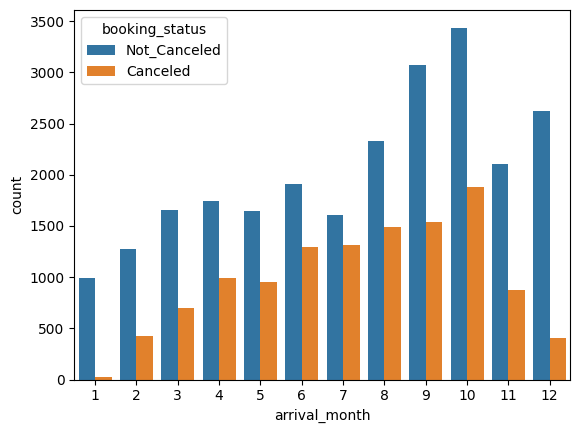

In [64]:
sns.countplot(df, x="arrival_month", hue="booking_status")

- In terms of the total booking number including both canceled and not canceled bookings, October is the busiest month.
- In terms of the not canceled booking number, October is also the busiest month.

### 2. Which market segment do most of the guests come from?

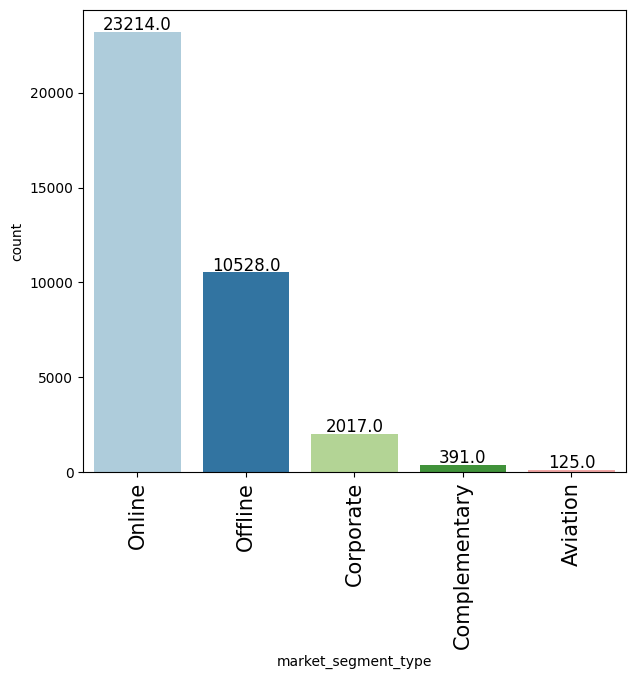

In [65]:
labeled_barplot(df, 'market_segment_type')

- Most of the guests came from the online booking.

### Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

<Figure size 600x400 with 0 Axes>

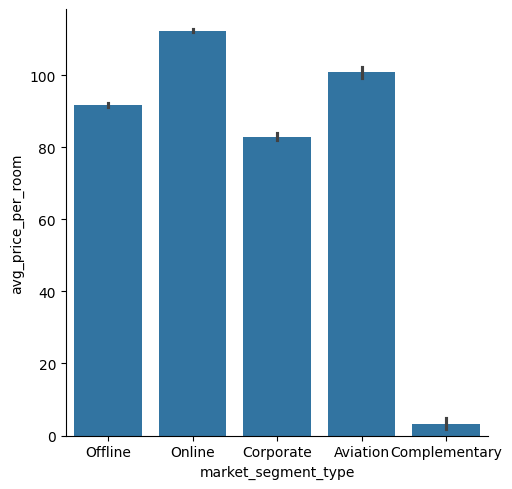

<Figure size 600x400 with 0 Axes>

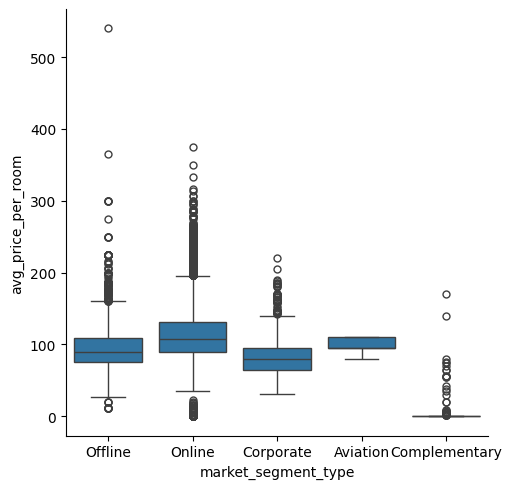

In [66]:
plt.figure(figsize=(6,4))
sns.catplot(df, x='market_segment_type', y='avg_price_per_room', kind='bar')

plt.figure(figsize=(6,4))
sns.catplot(df, x='market_segment_type', y='avg_price_per_room', kind='box');

In [67]:
df.groupby(['market_segment_type'])['avg_price_per_room'].mean()

market_segment_type
Aviation         100.704000
Complementary      3.141765
Corporate         82.911740
Offline           91.632679
Online           112.256855
Name: avg_price_per_room, dtype: float64

- Online bookings have the highest mean, median, and 75% percentile of average price per room.
- Complementary bookings have the lowest average room price as expected, but it has a few outlier data.
- Corporate bookings have the lowest average room price other than complementary booking, in terms of the mean, 25% percentile, median, and 75% percentile price.
- The room price from Aviation bookings ranks the second, in terms of the mean and 75% percentile price. It also has no outliers in the data.

### What percentage of bookings are canceled?

In [68]:
df['booking_status'].value_counts(normalize=True)

booking_status
Not_Canceled    0.672364
Canceled        0.327636
Name: proportion, dtype: float64

In [69]:
print('The percentage of bookings are canceled is ',np.round(df['booking_status'].value_counts(normalize=True)[1]*100, 2), '%', sep="")

The percentage of bookings are canceled is 32.76%


### Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

In [70]:
df[df['repeated_guest']==1]['booking_status'].value_counts(normalize=True)

booking_status
Not_Canceled    0.982796
Canceled        0.017204
Name: proportion, dtype: float64

In [71]:
print('The percentage of repeating guests cancel is ', np.round(df[df['repeated_guest']==1]['booking_status'].value_counts(normalize=True)[1]*100, 2), "%", sep="")

The percentage of repeating guests cancel is 1.72%


### Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


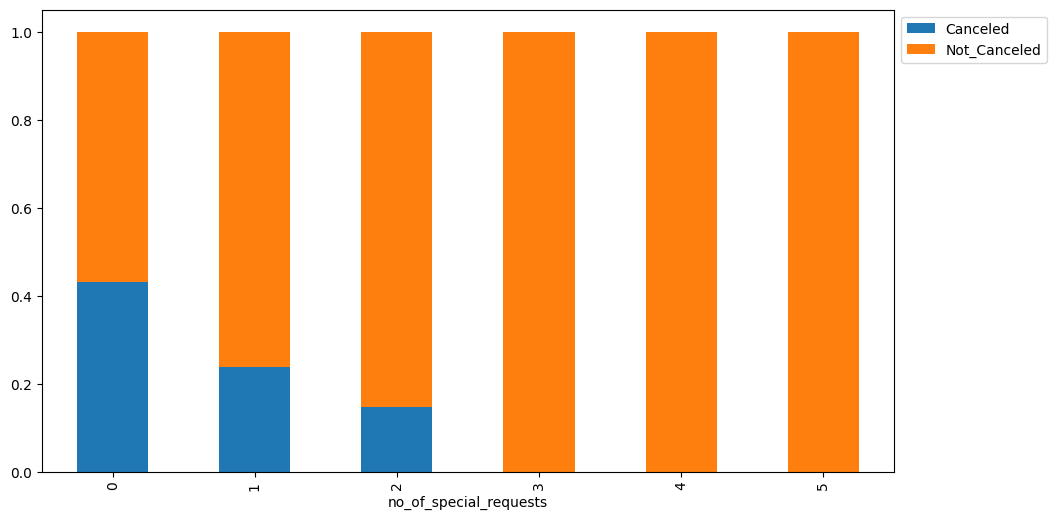

In [72]:
stacked_barplot(df, "no_of_special_requests", "booking_status")

- Yes. The number of special requests affect the booking cancellation. The percentage of booking cancellation decreases with increasing number of special requests.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Check missing value

In [73]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

- There are no missing values in the data.

### Outlier detection

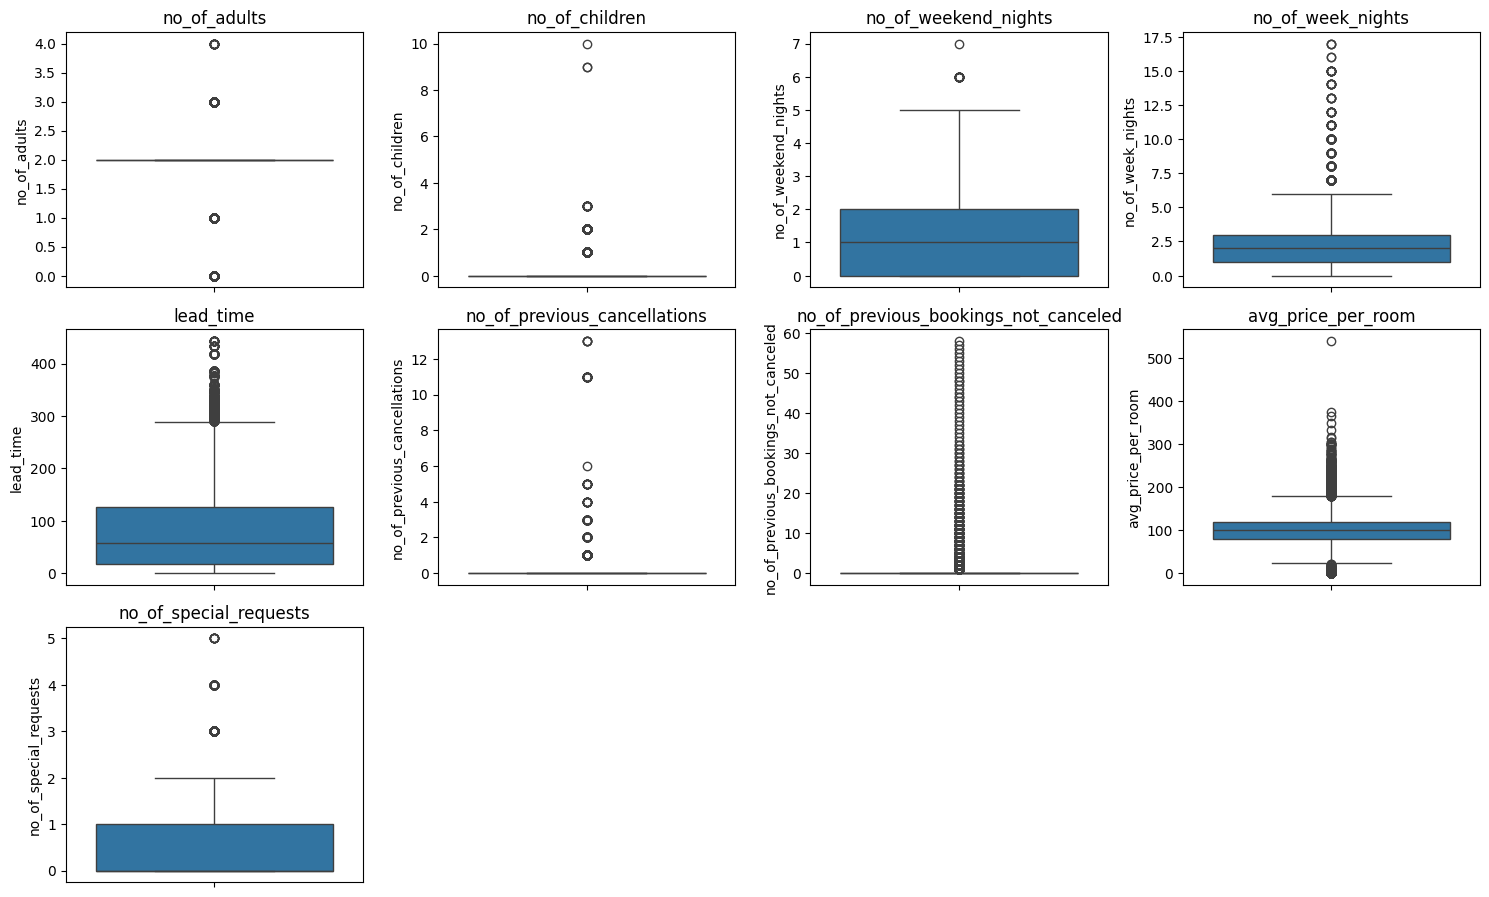

In [74]:
numeric_columns = ['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','lead_time','no_of_previous_cancellations',
                   'no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']

plt.figure(figsize=(15,12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4,4,i+1)
    sns.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- There are many outliers in the dataset, but they seem to have reasonable values. So no treatment will be applied.

# Data preparation for model building

Since booking status is a categorical type data, we need to change it to numerical type for model building.

In [75]:
df = df.replace({'Not_Canceled': 0, 'Canceled': 1})

# Check the data again
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests  booking_status  
0                       0               0  
1                       1               0  
2                       0               1  
3                       0               1  
4                       0               1

In [76]:
X = df.drop('booking_status', axis=1)
Y = df['booking_status']

# Create dummy variables
X = pd.get_dummies(X, drop_first=True, dtype=int)

# add a constant
X = sm.add_constant(X)

# split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

X.head()

const  no_of_adults  no_of_children  no_of_weekend_nights  \
0    1.0             2               0                     1   
1    1.0             2               0                     2   
2    1.0             1               0                     2   
3    1.0             2               0                     0   
4    1.0             2               0                     1   

   no_of_week_nights  required_car_parking_space  lead_time  arrival_year  \
0                  2                           0        224          2017   
1                  3                           0          5          2018   
2                  1                           0          1          2018   
3                  2                           0        211          2018   
4                  1                           0         48          2018   

   arrival_month  arrival_date  ...  room_type_reserved_Room_Type 2  \
0             10             2  ...                               0   
1             11             6  ...                               0   
2              2            28  ...                               0   
3              5            20  ...                               0   
4              4            11  ...                               0   

   room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   market_segment_type_Corporate  market_segment_type_Offline  \
0                              0                            1   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   market_segment_type_Online  
0                           0  
1                           1  
2                           1  
3                           1  
4                           1  

[5 rows x 28 columns]

In [77]:
print('Shape of Training set: ', X_train.shape)
print('Shape of Test set: ', X_test.shape)
print('Percentage of classes in training set:')
print(y_train.value_counts(normalize=True))
print('Percentage of classes in training set:')
print(y_train.value_counts(normalize=True))

Shape of Training set:  (25392, 28)
Shape of Test set:  (10883, 28)
Percentage of classes in training set:
booking_status
0    0.670644
1    0.329356
Name: proportion, dtype: float64
Percentage of classes in training set:
booking_status
0    0.670644
1    0.329356
Name: proportion, dtype: float64


## EDA

- It is a good idea to explore the data once again after manipulating it.

- Since we didn't process the data, we won't do the EDA again.

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [78]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                   3.946816e+07
no_of_adults                            1.348154e+00
no_of_children                          1.978229e+00
no_of_weekend_nights                    1.069475e+00
no_of_week_nights                       1.095667e+00
required_car_parking_space              1.039928e+00
lead_time                               1.394914e+00
arrival_year                            1.430830e+00
arrival_month                           1.275673e+00
arrival_date                            1.006738e+00
repeated_guest                          1.783516e+00
no_of_previous_cancellations            1.395689e+00
no_of_previous_bookings_not_canceled    1.651986e+00
avg_price_per_room                      2.050421e+00
no_of_special_requests                  1.247278e+00
type_of_meal_plan_Meal Plan 2           1.271851e+00
type_of_meal_plan_Meal Plan 3           1.025216e+00
type_of_meal_plan_Not Selected          1.272183e+00
room_type_r

- The VIF for all non-categorical independent variables are below 5. So there is no multicollinearity in the dataset.

## Building a Logistic Regression model

In [79]:
# Fit a logistic regression model
logit = sm.Logit(y_train, X_train)
lg = logit.fit(disp=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [80]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Thu, 16 May 2024   Pseudo R-squ.:                  0.3293
Time:                        18:45:05   Log-Likelihood:                -10793.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.5923    120.817     -7.653      0.000   -1161.390    -687.795
no_of_adults                             0.1135      

- The negative coefficient means the probability of a booking to be canceled decreases with the increase of the corresponding variable.
- The positive coefficient means the probability of a booking to be canceled increases with the increase of the corresponding variable.

## Model performance evaluation

**Model can make wrong predictions as:**
1. Predicting a booking is canceled, but the booking is actually not canceled.
2. Precdcting a booking is not canceled, but the booking is actually canceled.

**Both cases are important as:**
1. If the model predict a booking is canceled, but the booking is actually not canceled, then the hotel needs to rearrange the rooms to make sure customers who book the hotel have room to stay. In the extreme case, the hotel may be overbooked and customers who book the room don't have room to stay. This will significantly affect hotel's reputation and customers' experience.
2. If the model predict a booking is not canceled, but the booking is actually canceled, then the hotel needs to take extra actions to resell those rooms. This can cause extra labor to advertise the booking, otherwise the canceled booking will affect hotel's revenue.

**Therefore, we need to reduce both False Negative and False Positive situations**
- We will use f1 score to evaluate the logistic regression model.

In [81]:
# Define a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # Check which probabilities are greater than the threshold
    pred_temp = model.predict(predictors) > threshold
    # Round off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # To compute accuracy
    recall = recall_score(target, pred) # To compute recall
    precision = precision_score(target, pred) # To compute precision
    f1 = f1_score(target, pred) # To compute f1 score

    # Create a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy: ": acc, "Recall: ": recall, "Precision: ": precision, "F1: ": f1},
        index=[0],
    )

    return df_perf

In [82]:
# Define a function to plot the confusion matrix of a classification model
def confusion_matrix_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2,2)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

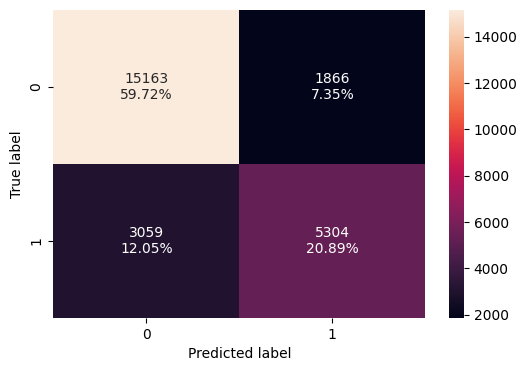

In [83]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [84]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy:   Recall:   Precision:       F1: 
0    0.806041  0.634222     0.739749  0.682933

- Although the accuracy looks reasonably good, f1 score is relatively low. We can further improve the model.
- Since the dataset does not have multicollinearity given the VIF values, we can improve the model by removing p-values larger than 0.05 first.

In [85]:
# initial list of columns
cols = X_train.columns.to_list()

# Set an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # Define the train set
    X_train_aux = X_train[cols]

    # Fit the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # Get the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with the maximum p-value
    feature_with_p_value = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_value)
    else:
        break

selected_features = cols
print(selected_features)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [86]:
X_train1 = X_train[selected_features]

In [87]:
logit1 = sm.Logit(y_train, X_train1)
lg1 = logit1.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Thu, 16 May 2024   Pseudo R-squ.:                  0.3283
Time:                        18:45:07   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -917.2860    120.456     -7.615      0.000   -1153.376    -681.196
no_of_adults                       0.1086      0.037      2.914      0.

- Now the high p-values are removed.

### We evaluate the model again.

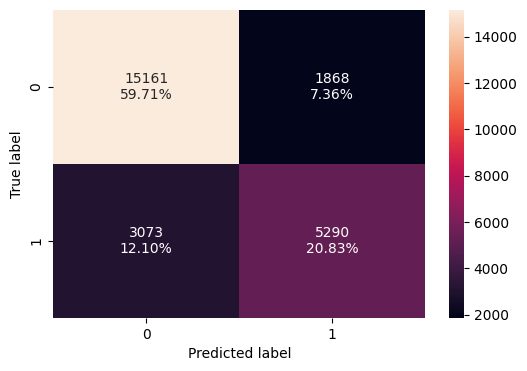

In [88]:
# Check the confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [89]:
# Check model performance using different metrics
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, X_train1, y_train)
log_reg_model_train_perf

Training performance:


Accuracy:   Recall:   Precision:       F1: 
0    0.805411  0.632548     0.739033  0.681657

- The f1 score decreases slightly, but it is not changed significantly.
- Let's check the model performance on test dataset.

In [90]:
X_test1 = X_test[selected_features]

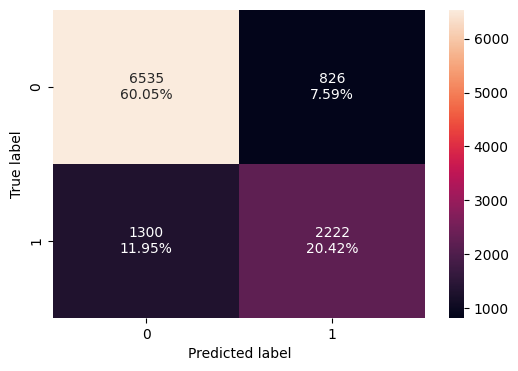

In [91]:
# Check the confusion matrix using test data set
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [92]:
# Check model performance using different metrics on test set
print("Testing performance:")
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1, X_test1, y_test)
log_reg_model_test_perf

Testing performance:


Accuracy:   Recall:   Precision:       F1: 
0    0.804649  0.630892     0.729003  0.676408

- The f1 score does not change significantly compared between training and test data sets. This indicates that the model is not overfitted.

# Model improvement by changing the thresholds

### ROC-AUC curve

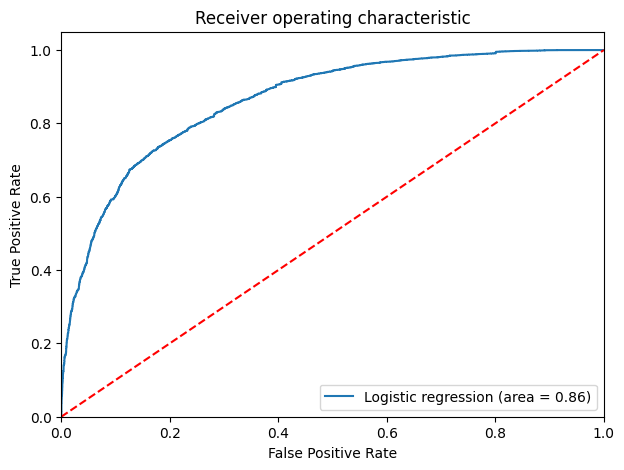

In [93]:
# First use ROC curve and compute the area under the ROC curve (ROC-AUC) to select the threshold
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label="Logistic regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

- The logistic model gives a relatively good performance on training set.

In [94]:
# Get the optimal threshold using ROC-AUC curve.
# The optimal threshold is where tpr is high and fpr is low.
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_roc_auc = thresholds[optimal_idx]
print("Threshold is: ",optimal_threshold_roc_auc)

Threshold is:  0.37104666234890077


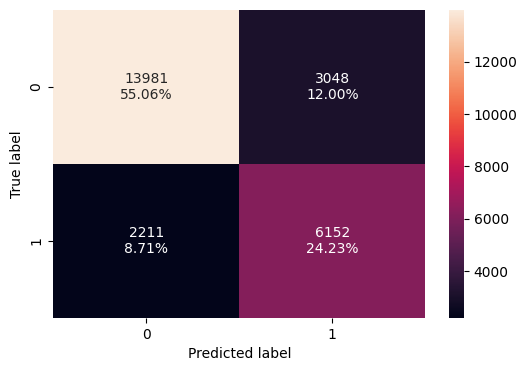

In [95]:
# Create confusion matrix using ROC-AUC threshold.
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_roc_auc)

In [96]:
# Check model performance using ROC-AUC threshold
log_reg_model_train_perf_roc_auc = model_performance_classification_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_roc_auc)
log_reg_model_train_perf_roc_auc

Accuracy:   Recall:   Precision:       F1: 
0    0.792888  0.735621     0.668696  0.700564

- F1 score is improved using this ROC-AUC threshold.

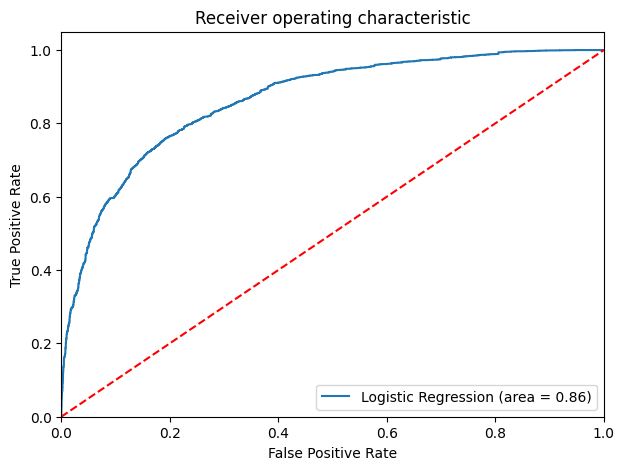

In [97]:
# Check the model performance using ROC-AUC threshold with test set
logit_roc_auc_test = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()


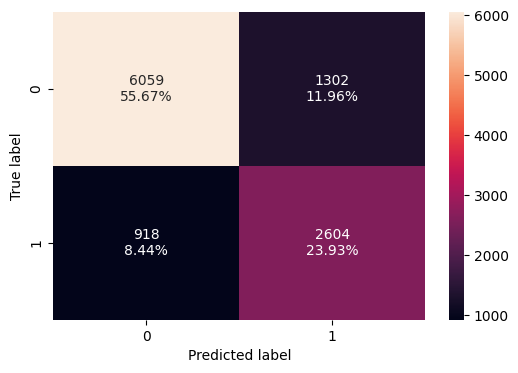

In [98]:
# Create confusion matrix using ROC-AUC threshold on test set
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold = optimal_threshold_roc_auc)

In [99]:
# Check the model performance using ROC-AUC threshold on test set
log_reg_model_test_perf_roc_auc = model_performance_classification_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_roc_auc)
log_reg_model_test_perf_roc_auc

Accuracy:   Recall:   Precision:       F1: 
0    0.796012  0.739353     0.666667  0.701131

- The model also performs well on the test set using this ROC-AUC threshold.

### Precision-recall curve

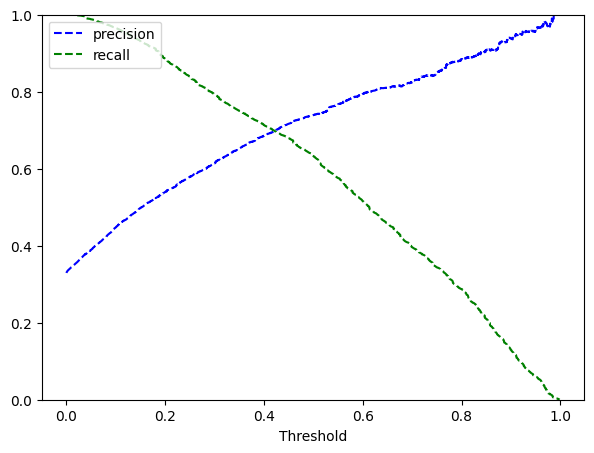

In [100]:
prec, rec, tre = precision_recall_curve(y_train, lg1.predict(X_train1))

def plot_prec_recall_vs_thresholds(precisions, recalls, thresholds):
    plt.figure(figsize=(7,5))
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_prec_recall_vs_thresholds(prec, rec, tre)

- At the threshold of around 0.4, we can get a balanced precision and recall.

In [101]:
# Get the threshold that precision and recall are the same
optimal_idx = np.argmin(np.abs(prec[:-1] - rec[:-1]))
optimal_threshold_prec_rec = tre[optimal_idx]
optimal_threshold_prec_rec

0.42095746142540286

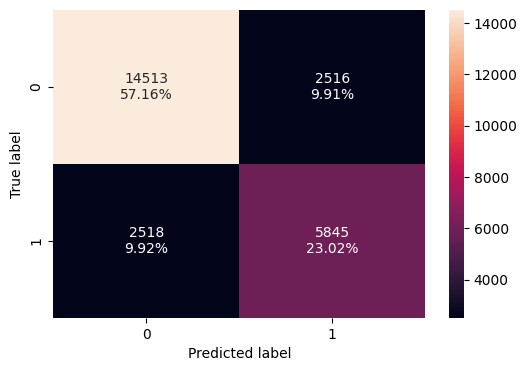

In [102]:
# Confusion matrix using Precision-recall curve threshold on training set
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_prec_rec)

In [103]:
# Check the model performance using Precision-recall curve threshold on training set
log_reg_model_train_perf_pre_rec = model_performance_classification_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_prec_rec)
log_reg_model_train_perf_pre_rec

Accuracy:   Recall:   Precision:       F1: 
0    0.801749  0.698912     0.699079  0.698995

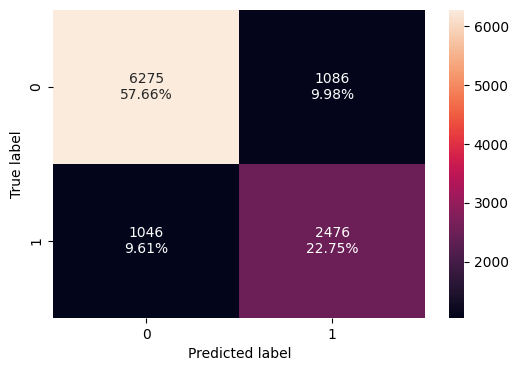

In [104]:
# Confusion matrix using Precision-recall curve threshold on test set
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_prec_rec)

In [105]:
# Check the model performance using Precision-recall curve threshold on test set
log_reg_model_test_perf_pre_rec = model_performance_classification_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_prec_rec)
log_reg_model_test_perf_pre_rec

Accuracy:   Recall:   Precision:      F1: 
0    0.804098   0.70301     0.695115  0.69904

- The precision-recall curce threshold performs slightly better than the original 0.5 threshold, given the higher f1 score.

## Final Model Summary

### Model performance comparison and final model selection

In [106]:
# Training set comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_roc_auc.T,
        log_reg_model_train_perf_pre_rec.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy:                                       0.805411   
Recall:                                         0.632548   
Precision:                                      0.739033   
F1:                                             0.681657   

             Logistic Regression-0.37 Threshold  \
Accuracy:                              0.792888   
Recall:                                0.735621   
Precision:                             0.668696   
F1:                                    0.700564   

             Logistic Regression-0.42 Threshold  
Accuracy:                              0.801749  
Recall:                                0.698912  
Precision:                             0.699079  
F1:                                    0.698995

In [107]:
# Test set comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_roc_auc.T,
        log_reg_model_test_perf_pre_rec.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy:                                       0.804649   
Recall:                                         0.630892   
Precision:                                      0.729003   
F1:                                             0.676408   

             Logistic Regression-0.37 Threshold  \
Accuracy:                              0.796012   
Recall:                                0.739353   
Precision:                             0.666667   
F1:                                    0.701131   

             Logistic Regression-0.42 Threshold  
Accuracy:                              0.804098  
Recall:                                0.703010  
Precision:                             0.695115  
F1:                                    0.699040

- All three models perform reasonably well on both the training set and test set, indicating comprable f1 scores between training and test sets. This shows that all models are not overfitted.
-  Among all three models, the threshold selected based on the ROC-AUC curve has the highest f1 score on both training and test sets. Therefore, we select the threshold of 0.37 in the final logistic regression model.

### Interpretation on the logistic model coefficients

In [108]:
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Thu, 16 May 2024   Pseudo R-squ.:                  0.3283
Time:                        18:45:13   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -917.2860    120.456     -7.615      0.000   -1153.376    -681.196
no_of_adults                       0.1086      0.037      2.914      0.

In [109]:
# Convert coefficients to odds
odds = np.exp(lg1.params)

# Find the percentage change
perc_change_odds = (odds - 1.) * 100.

# Create the dataframe to present odds and their percentage change
pd.DataFrame({"odds": odds, "Change_odds %": perc_change_odds}, index=X_train1.columns)

odds  Change_odds %
const                           0.000000    -100.000000
no_of_adults                    1.114754      11.475363
no_of_children                  1.164360      16.436009
no_of_weekend_nights            1.114753      11.475256
no_of_week_nights               1.042636       4.263629
required_car_parking_space      0.203048     -79.695231
lead_time                       1.015835       1.583521
arrival_year                    1.573235      57.323511
arrival_month                   0.958528      -4.147245
repeated_guest                  0.064797     -93.520258
no_of_previous_cancellations    1.257157      25.715665
avg_price_per_room              1.019348       1.934790
no_of_special_requests          0.229941     -77.005947
type_of_meal_plan_Meal Plan 2   1.179916      17.991562
type_of_meal_plan_Not Selected  1.330892      33.089244
room_type_reserved_Room_Type 2  0.700461     -29.953888
room_type_reserved_Room_Type 4  0.753830     -24.617006
room_type_reserved_Room_Type 5  0.479403     -52.059666
room_type_reserved_Room_Type 6  0.380991     -61.900934
room_type_reserved_Room_Type 7  0.239033     -76.096691
market_segment_type_Corporate   0.452584     -54.741616
market_segment_type_Offline     0.167504     -83.249628

**Summary of the model**
- The positive coefficients for no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, arrival_year, no_of_previous_cancellations, avg_price_per_room, type_of_meal_plan_Meal Plan 2, and type_of_meal_plan_Not Selected imply that the probability of canceled booking increases when increasing these variables.
- The negative coefficients for required_car_parking_space, arrival_month, repeated_guest, no_of_special_requests, room_type_reserved_Room_Type 2, room_type_reserved_Room_Type 4, room_type_reserved_Room_Type 5, room_type_reserved_Room_Type 6, room_type_reserved_Room_Type 7, market_segment_type_Corporate, and market_segment_type_Offline imply that the probability of canceled booking decreases when increasing these variables.
- Among all the independent variables, holding all other features constant, increasing 1 unit in arrival year increases the most in the chances of canceled booking. It will increase the odds of canceled booking by 1.57 times or 57.3%. Meanwhile, 1 unit increase in no_of_previous_cancellations, type_of_meal_plan_Not Selected, no_of_previous_cancellations, and no_of_children also largely increase the chances of canceled booking.
- Among all the independent variables, holding all other features constant, increasing 1 unit in repeated_guest decreases the most in the chances of canceled booking. It will decrease the odds of canceled booking by 0.06 times or 93.5%. Meanwhile, 1 unit increase in market_segment_type_Offline, required_car_parking_space, no_of_special_requests, and room_type_reserved_Room_Type 7 also decrease the chances of canceled booking.

## Building a Decision Tree model

### Build the decision tree model

In [110]:
X = df.drop('booking_status', axis=1)
Y = df['booking_status']

# Create dummy variables
X = pd.get_dummies(X, drop_first=True, dtype=int)

# split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

X.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                           0        224          2017             10   
1                           0          5          2018             11   
2                           0          1          2018              2   
3                           0        211          2018              5   
4                           0         48          2018              4   

   arrival_date  repeated_guest  ...  room_type_reserved_Room_Type 2  \
0             2               0  ...                               0   
1             6               0  ...                               0   
2            28               0  ...                               0   
3            20               0  ...                               0   
4            11               0  ...                               0   

   room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   market_segment_type_Corporate  market_segment_type_Offline  \
0                              0                            1   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   market_segment_type_Online  
0                           0  
1                           1  
2                           1  
3                           1  
4                           1  

[5 rows x 27 columns]

In [111]:
model = DecisionTreeClassifier(criterion='gini', random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Evaluation of the decision tree model using f1 score

In [112]:
# Define a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # Predict using independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)

    # Create a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [113]:
# Define a function to plot confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)

    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2,2)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


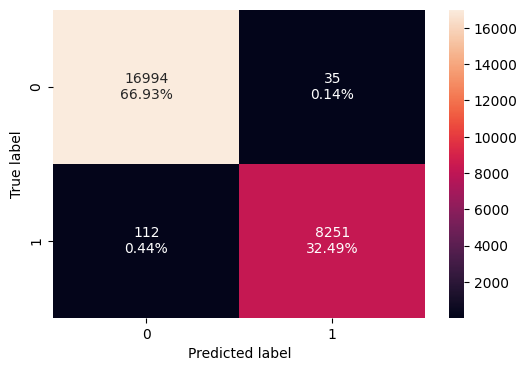

In [114]:
# Confusion matrix on training set
confusion_matrix_sklearn(model, X_train, y_train)

In [115]:
# Metrics on training set
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

Accuracy    Recall  Precision        F1
0  0.994211  0.986608   0.995776  0.991171

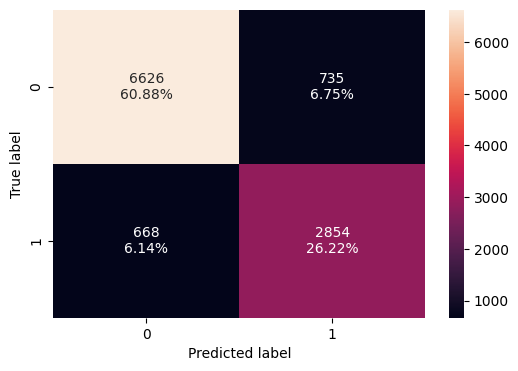

In [116]:
# Confusion matrix using test set
confusion_matrix_sklearn(model, X_test, y_test)

In [117]:
# Metrics on test set
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

Accuracy    Recall  Precision      F1
0  0.871083  0.810335   0.795208  0.8027

- There is a substantial decrease in f1 score from training set (0.99) to test set (0.81). This indicates that the decision tree model here is overfitted.

### Visualization on the decision tree

In [118]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


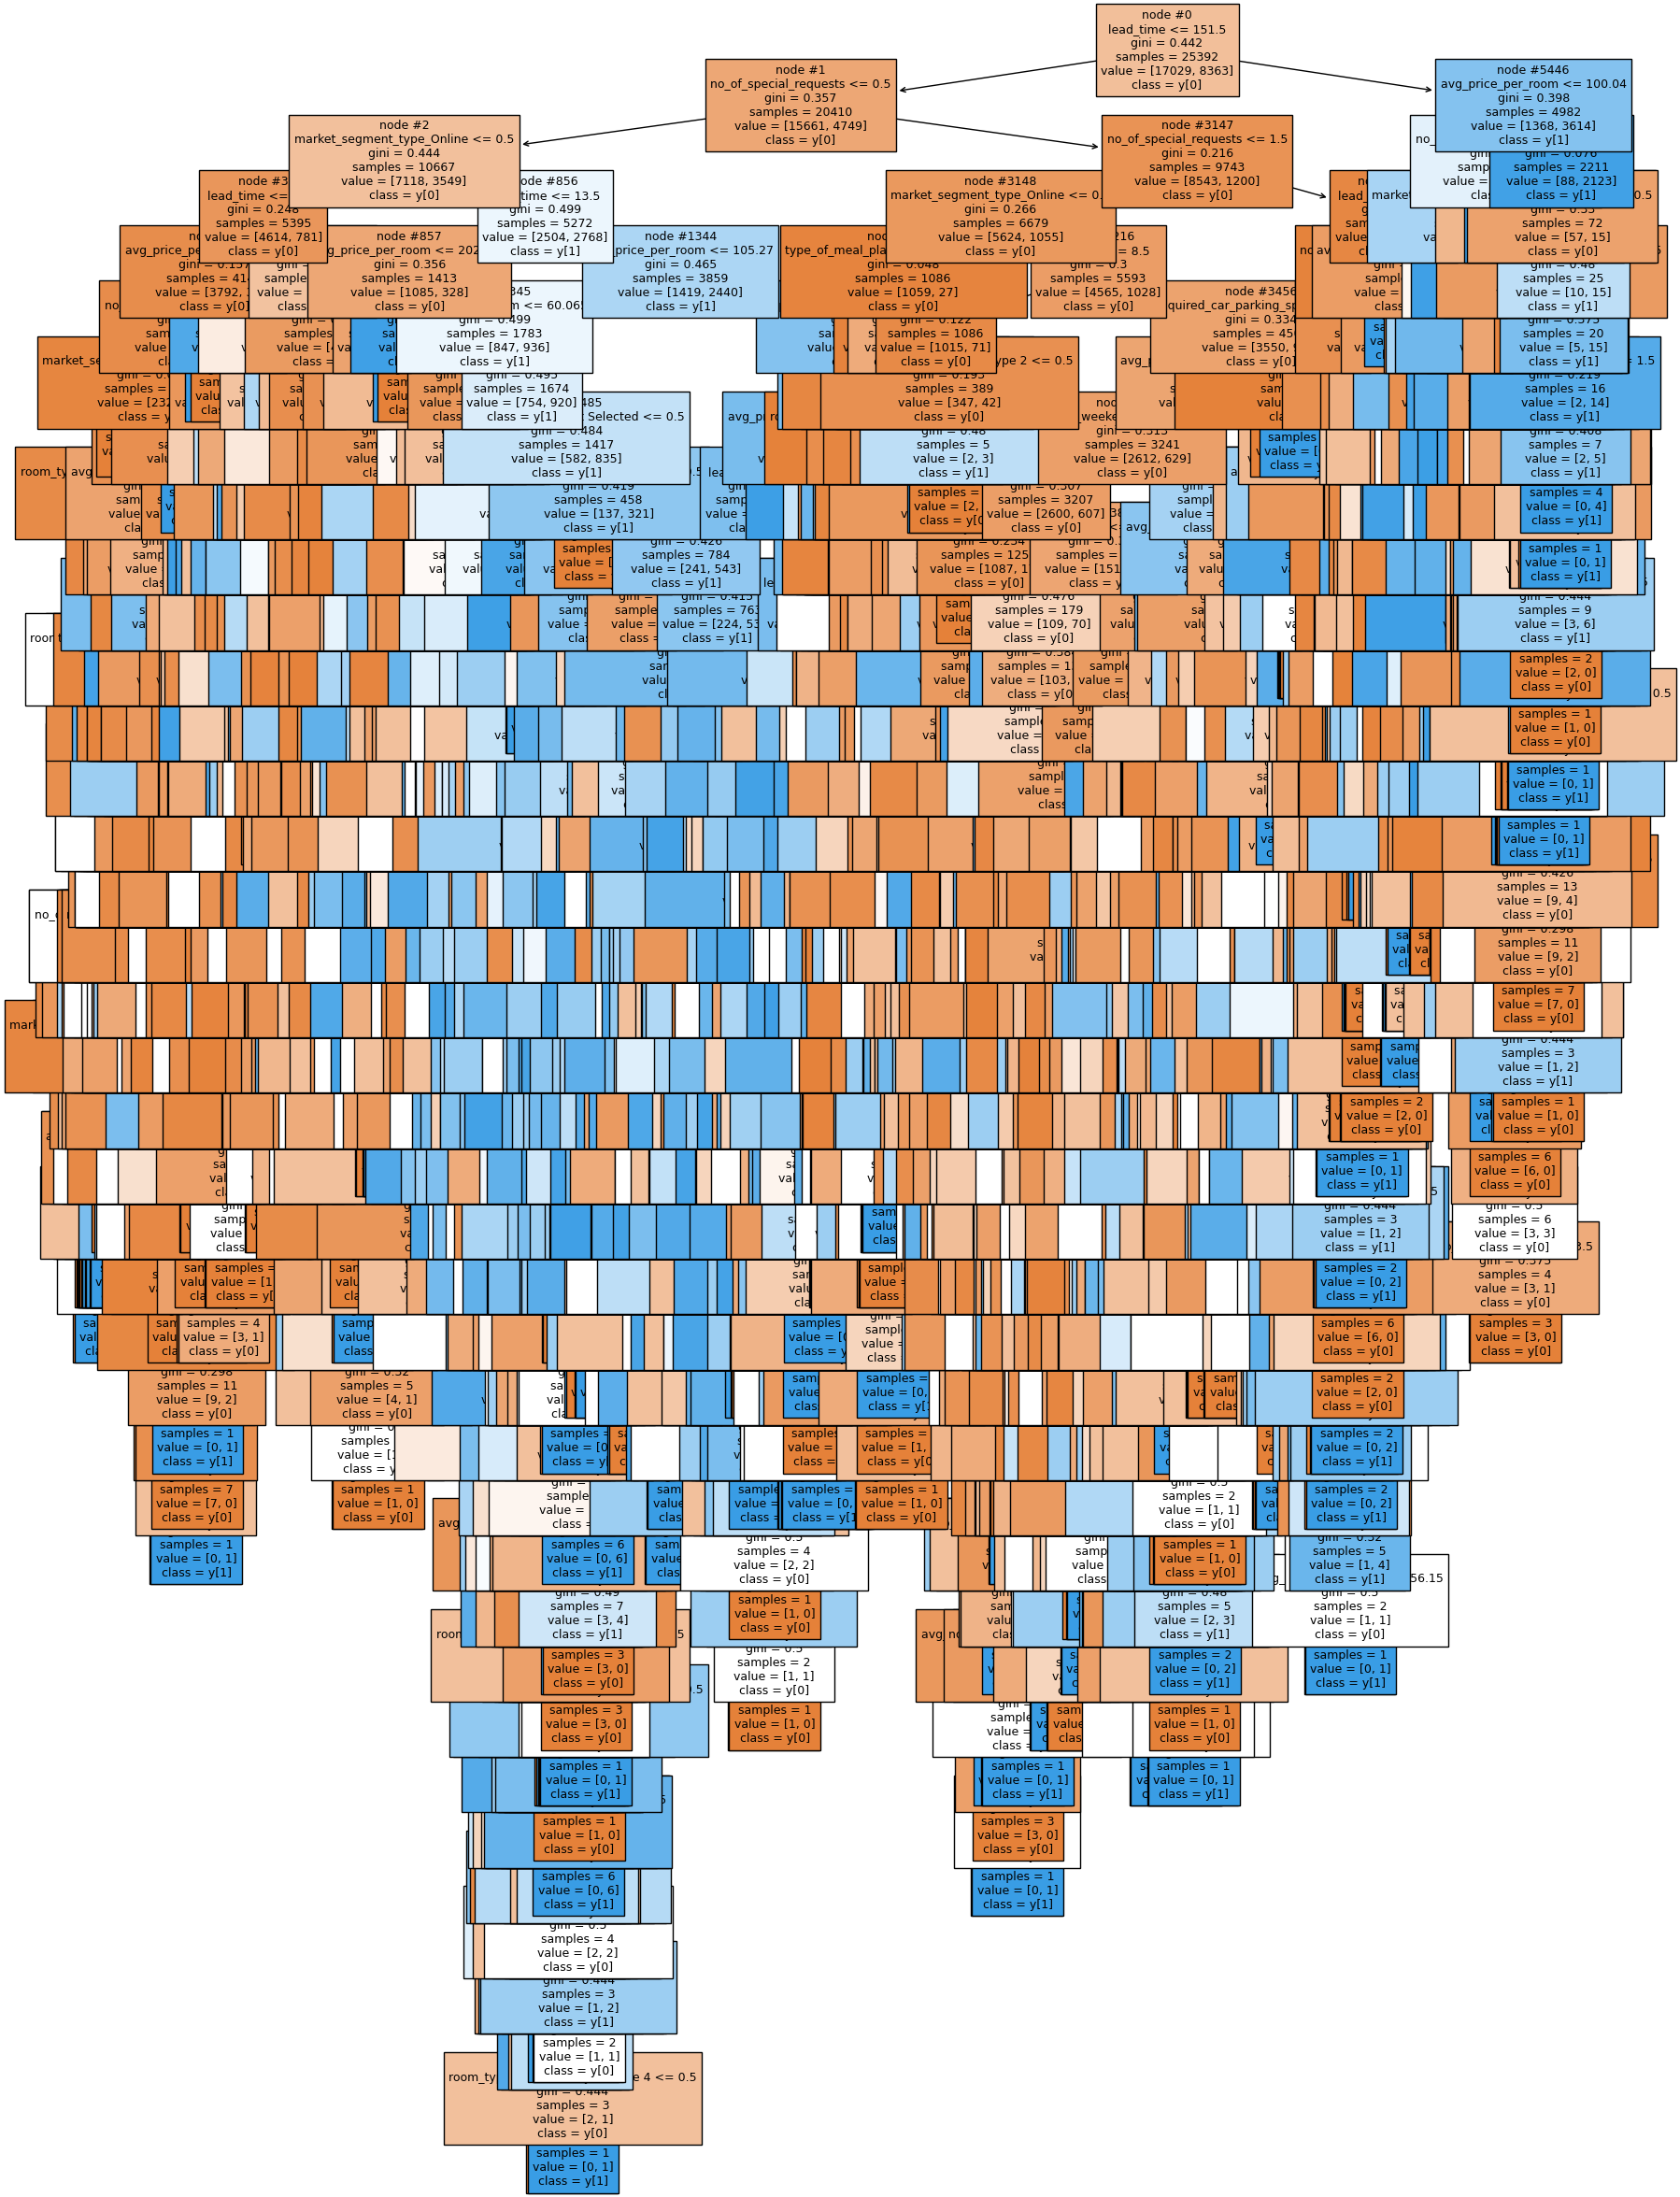

In [119]:
# Make the plot
plt.figure(figsize=(20,30))

out = tree.plot_tree(
    model,
    feature_names = feature_names,
    filled = True,
    fontsize = 9,
    node_ids = True,
    class_names = True
)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [120]:
# Test report showing the rules of a decision tree
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [147.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type

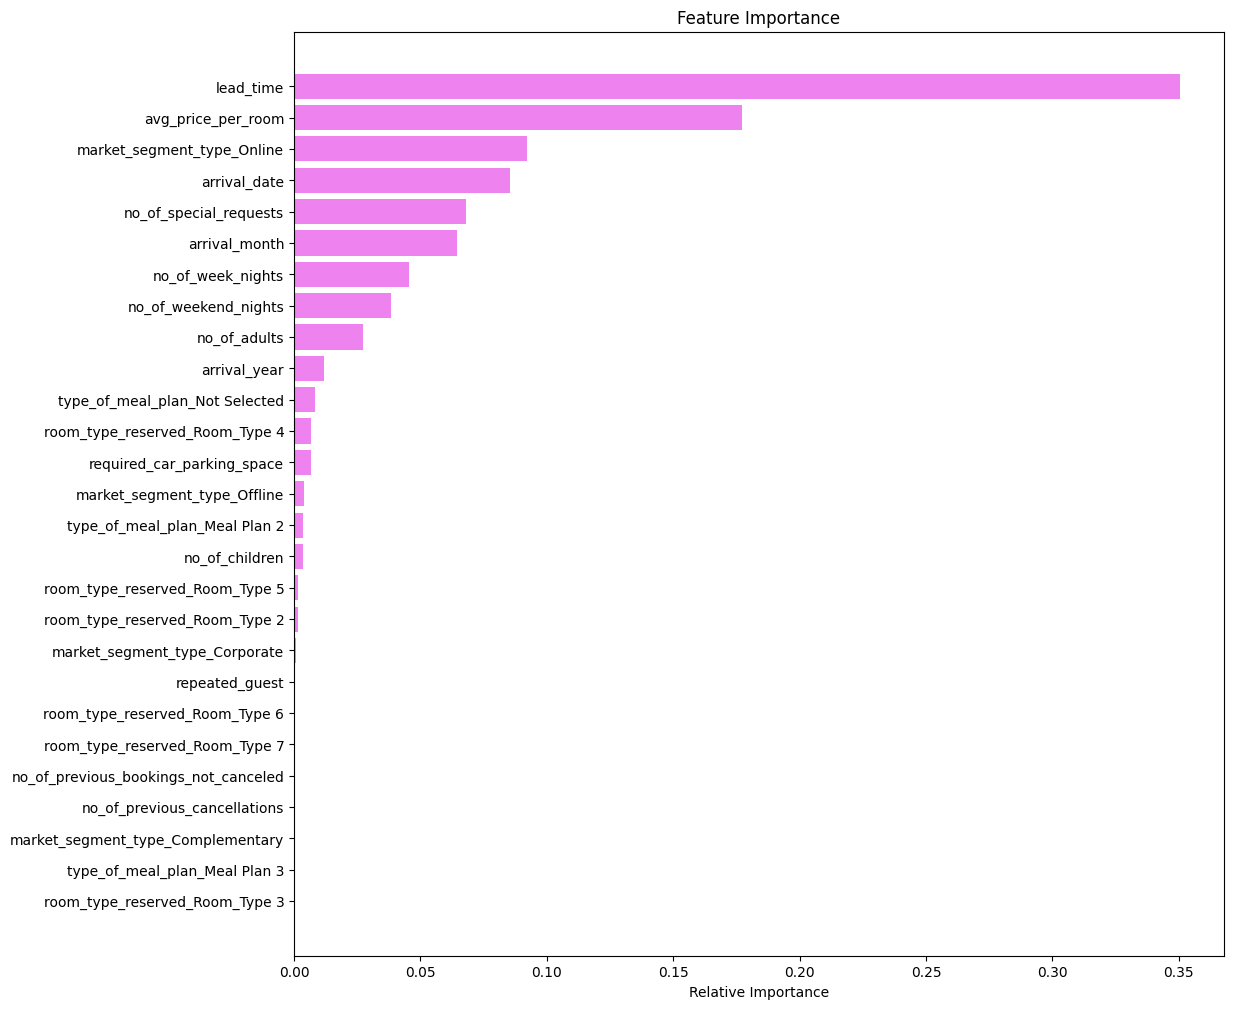

In [121]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title("Feature Importance")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- lead time, avg_price_per_room, and market_segment_type_online are top three important features.
- The current decision tree model is too complicated and it tends to overfit the training set and does not perform well on the test set. Therefore, pruning the tree is needed.

## Do we need to prune the tree?

**We need to prune the tree**

### Pre-pruning using GridSearch for Hyperparameter tuning

In [122]:
# Choose the type of classifier
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2,7,2),
    "max_leaf_nodes": [50,75,150,250],
    "min_samples_split": [10,30,50,70],
}

# Type of score used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the model to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best model
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

### Evaluation of the pre-pruned decision tree model

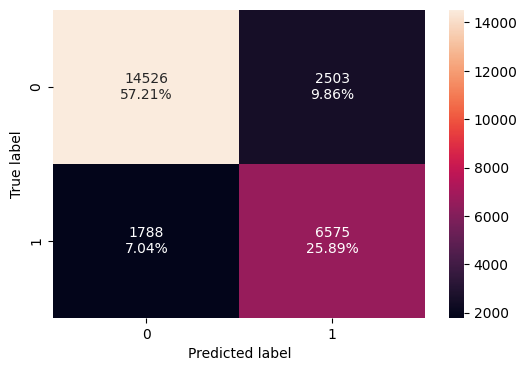

In [123]:
# Confusion matrix on training set
confusion_matrix_sklearn(estimator, X_train, y_train)

In [124]:
# Compute on training set
decision_tree_perf_train_pre = model_performance_classification_sklearn(estimator, X_train, y_train)
decision_tree_perf_train_pre

Accuracy    Recall  Precision        F1
0   0.83101  0.786201   0.724278  0.753971

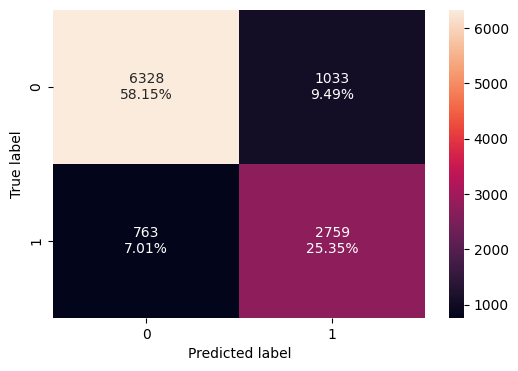

In [125]:
# Confusion matrix on test set
confusion_matrix_sklearn(estimator, X_test, y_test)

In [126]:
# Metrics on test set
decision_tree_perf_test_pre = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_perf_test_pre

Accuracy    Recall  Precision        F1
0  0.834972  0.783362   0.727584  0.754444

- The model now can provide generalized results for both training and test data set, since the f1 score is comparable (around 0.75) between the two.

In [127]:
# Visualization of the tree
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

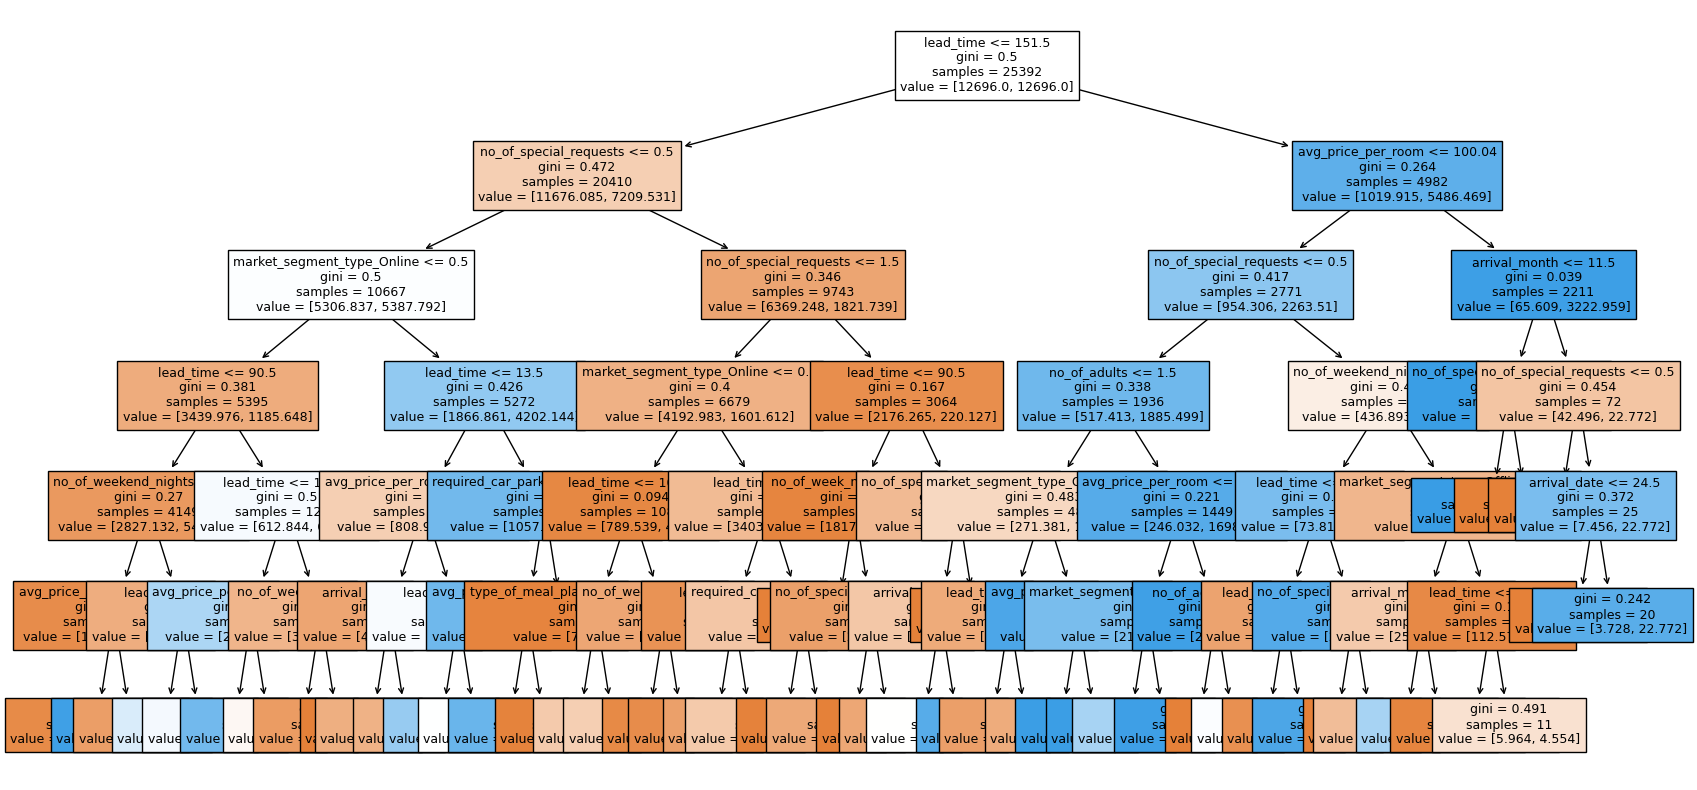

In [128]:
plt.figure(figsize=(20,10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [129]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 132.08] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 25.81] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

- Now the pre-pruned model is simplified and it performs comparably well for both training and test datasets.

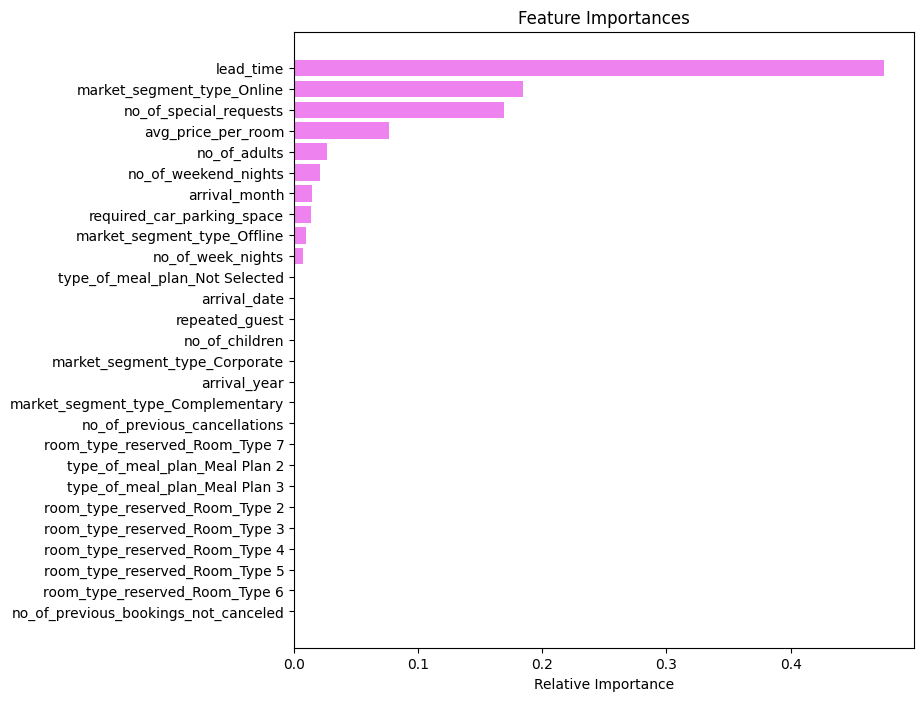

In [130]:
# Visualize the feature importance
plt.figure(figsize=(8,8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- In the pre-pruned decision tree model, the top three important features are lead_time, market_segment_type_online, and no_of_special_requests.

### Post-pruning using cost complexity parameters

In [131]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [132]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.008376
1    -2.710505e-20    0.008376
2     2.933821e-20    0.008376
3     2.933821e-20    0.008376
4     2.933821e-20    0.008376
...            ...         ...
1837  8.901596e-03    0.328058
1838  9.802243e-03    0.337860
1839  1.271875e-02    0.350579
1840  3.412090e-02    0.418821
1841  8.117914e-02    0.500000

[1842 rows x 2 columns]

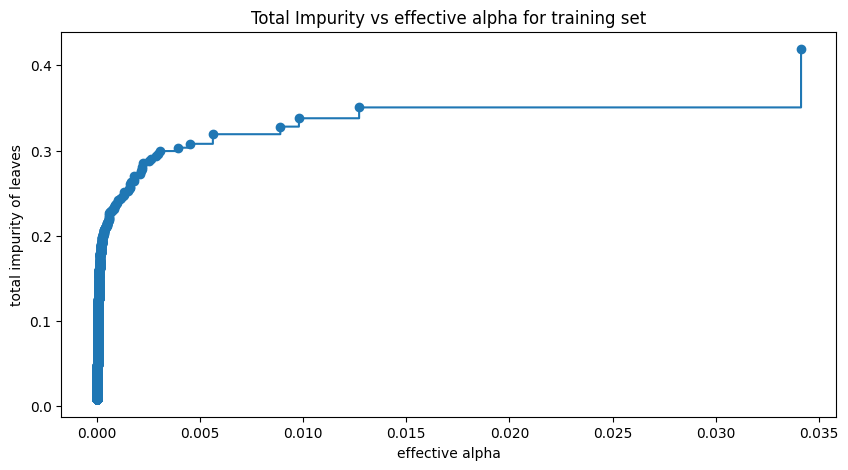

In [133]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next we train a decision tree using effective alphas.

In [134]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
    clfs[-1].tree_.node_count, ccp_alphas[-1]
))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136943


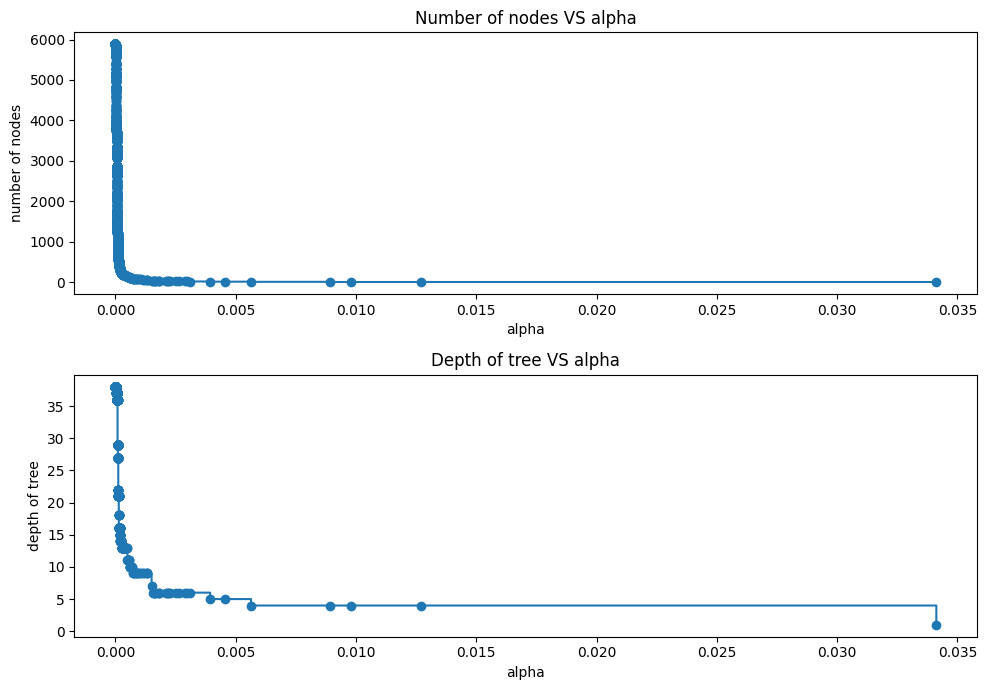

In [135]:
# For the remainder, we remove the last element in clfs and ccp_alphas.
# We show the relations between number of nodes and alpha value, and tree depth and alpha value.
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2, 1, figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes VS alpha")

ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth of tree VS alpha")
fig.tight_layout()

In [136]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

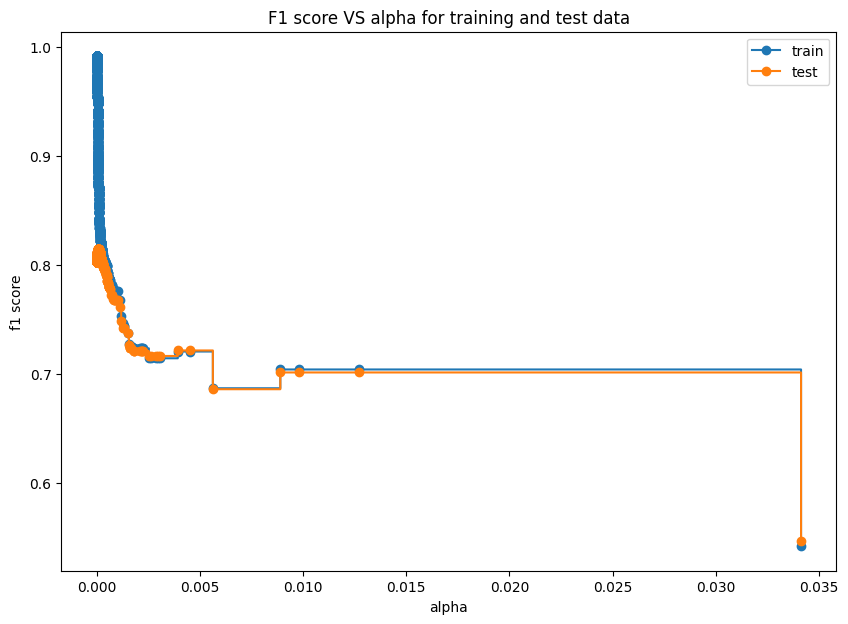

In [137]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.set_xlabel("alpha")
ax.set_ylabel("f1 score")
ax.set_title("F1 score VS alpha for training and test data")
ax.legend()
plt.show()

In [138]:
# Create a model based on the highest f1 score in test data
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=6.193966203116947e-05, random_state=1)


### Evaluation of the post-pruned decision tree model

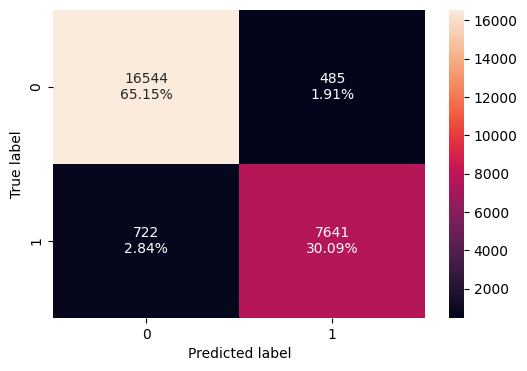

In [139]:
# Confusion matrix on training set
confusion_matrix_sklearn(best_model, X_train, y_train)

In [140]:
# Metrics on training set
decision_tree_perf_train_pos = model_performance_classification_sklearn(best_model, X_train, y_train)
decision_tree_perf_train_pos

Accuracy    Recall  Precision      F1
0  0.952465  0.913667   0.940315  0.9268

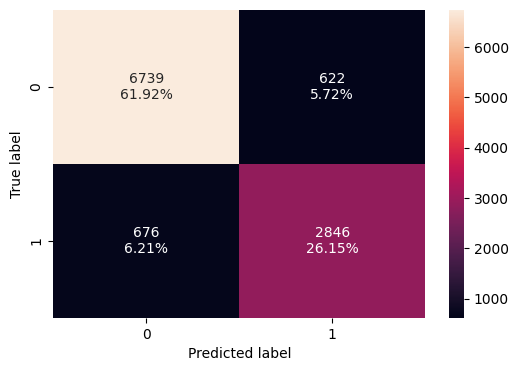

In [141]:
# Confusion matrix on test set
confusion_matrix_sklearn(best_model, X_test, y_test)

In [142]:
# Metrics on test set
decision_tree_perf_test_pos = model_performance_classification_sklearn(best_model, X_test, y_test)
decision_tree_perf_test_pos

Accuracy    Recall  Precision        F1
0  0.880731  0.808064   0.820646  0.814306

- It seems the post-pruned decision tree model does not perform well on the test dataset, which gives a lower f1 score on the test dataset than training dataset.

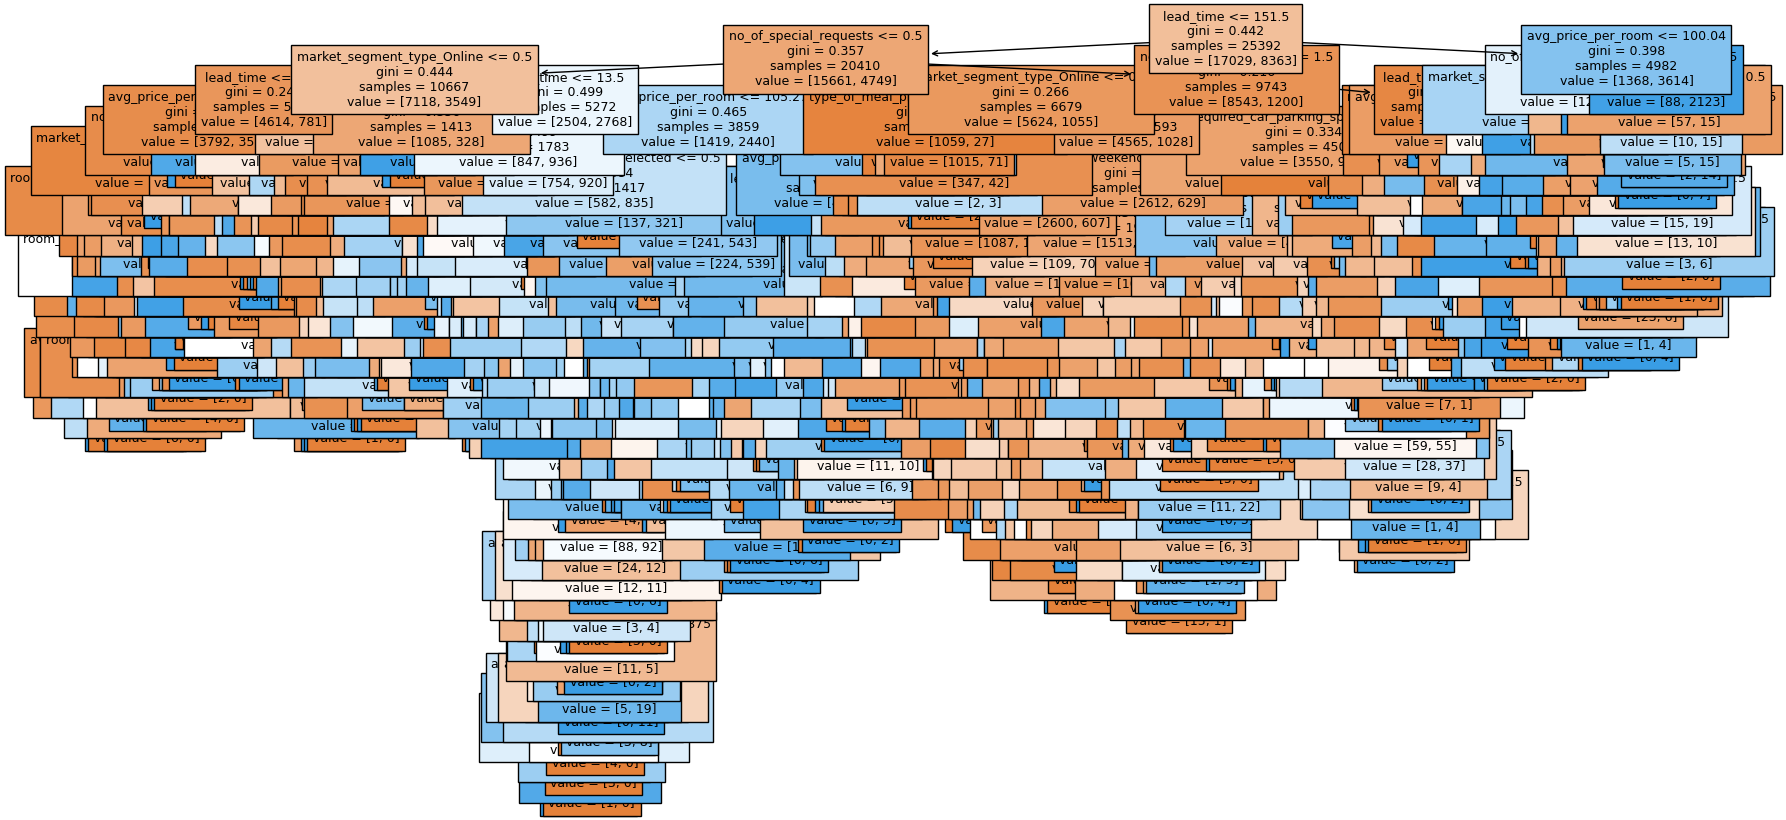

In [143]:
# Visualization on the decision tree
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [144]:
# Text report showing the rules of a decision tree -
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  11.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [82.00, 1.00] class: 0
|   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [147.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_T

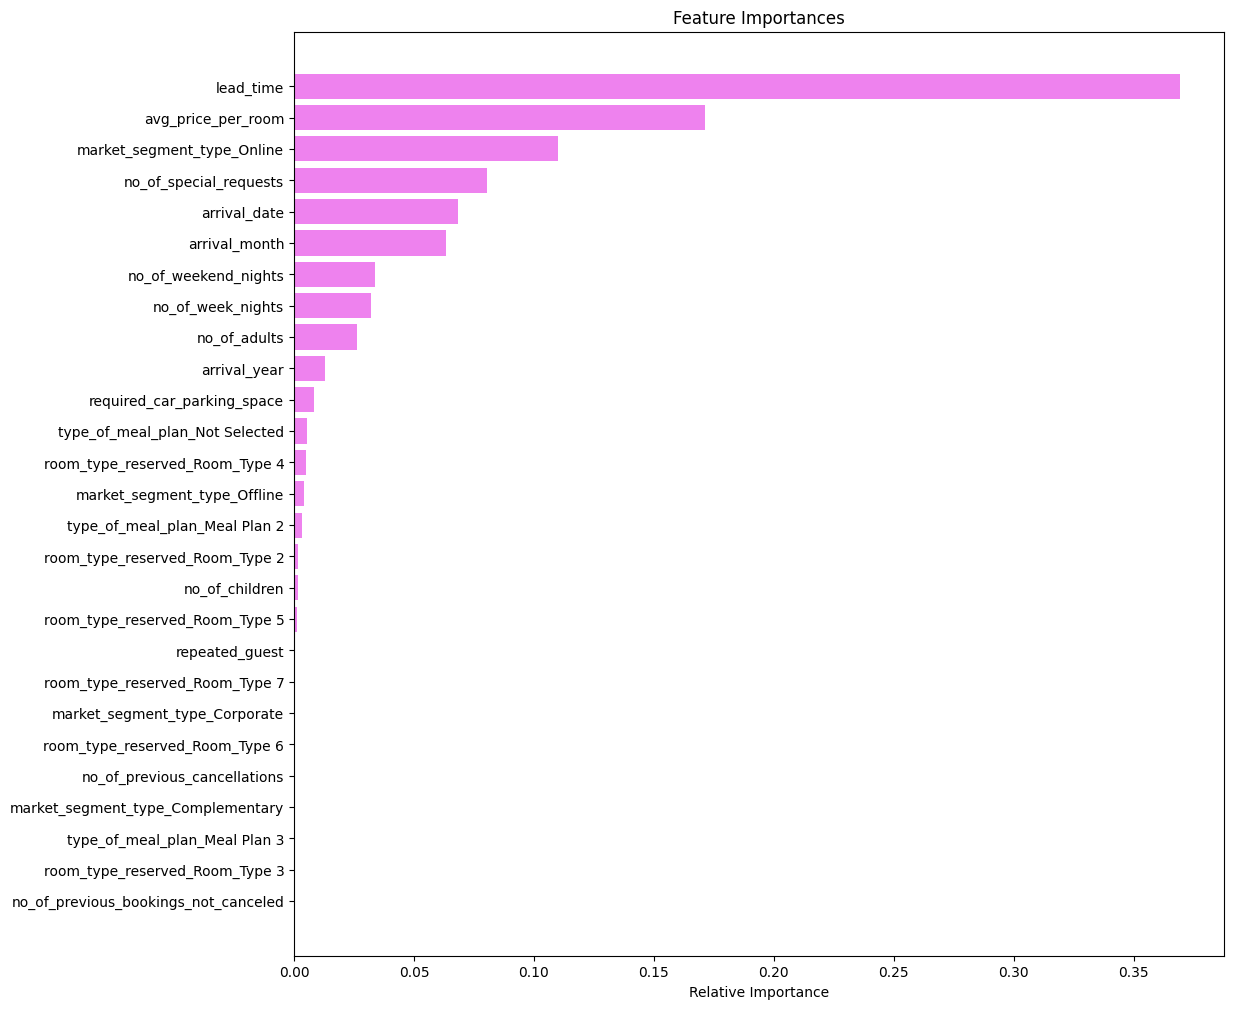

In [145]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- lead time, avg_price_per_room, and market_segment_type_online are top three important features.
- The post-pruned decision tree model remains too complicated and it tends to overfit the training set and does not perform well on the test set.

## Model Performance Comparison and Conclusions

In [146]:
# Training data performance comparison
models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_perf_train_pre.T,
        decision_tree_perf_train_pos.T,
    ],
    axis=1
)
models_train_comp_df.columns = [
    "Decision tree before pruning",
    "Decision tree after pre-pruning",
    "Decision tree after post-pruning",
]
print("Training performance comparison")
models_train_comp_df

Training performance comparison


Decision tree before pruning  Decision tree after pre-pruning  \
Accuracy                       0.994211                         0.831010   
Recall                         0.986608                         0.786201   
Precision                      0.995776                         0.724278   
F1                             0.991171                         0.753971   

           Decision tree after post-pruning  
Accuracy                           0.952465  
Recall                             0.913667  
Precision                          0.940315  
F1                                 0.926800

In [147]:
# Test data performance comparison
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_perf_test_pre.T,
        decision_tree_perf_test_pos.T,
    ],
    axis=1
)
models_test_comp_df.columns = [
    "Decision tree before pruning",
    "Decision tree after pre-pruning",
    "Decision tree after post-pruning",
]
print("Test performance comparison")
models_test_comp_df

Test performance comparison


Decision tree before pruning  Decision tree after pre-pruning  \
Accuracy                       0.871083                         0.834972   
Recall                         0.810335                         0.783362   
Precision                      0.795208                         0.727584   
F1                             0.802700                         0.754444   

           Decision tree after post-pruning  
Accuracy                           0.880731  
Recall                             0.808064  
Precision                          0.820646  
F1                                 0.814306

- Decision tree model with post-pruning performs similarly with the decision tree model without pruning. Although the decision tree with pre-pruning gives lower f1 scores on both training and test sets compared to other two models. This model performs more genearlized on both training and test datasets compared to the other two. Therefore, we choose the pre-pruned decision tree model as the final model.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

- By comparing the final logistic regression model and final decision tree model, the decision tree model gives a larger f1 score. Therefore, we prefer the pre-pruned decision tree model as the final model.
- In the final decision tree model, 13.5 < lead_time <= 151.5, no_of_special_requests <= 0.5, market_segment_type_Online > 0.5, required_car_parking_space < 0.5 leads to the largest possibility of canceled booking.
- Although the final logistic regression gives a lower f1 score, it alao provides insights for the hotel to better manage the booking cancellations. For example, the record of previous cancellation can lead to higher possibility of canceled booking. Meanwhile, repeated customers tend to reduce the possibility of booking cancellation.
- For the hotel to maximize its profit, based on the decision tree model, the hotel can reduce the cancellation refunds for customers who book the hotel online with the lead time between 5 months and 2 weeks. The hotel can also provide more attractive packages for customers to book the hotel with add-on special requests or car parking space. In this case, the hotel can earn more from the payment of those add-on requests or parking fee and reduce the possibility of booking cancellation.
- Based on the logistics regression model interpretation, the hotel can add more strict cancellation policy for customers who have previous cancellation records. At the same time, the hotel can provide more promotions to attract repeated customers to keep their loyalty to the hotel.
- The hotel should collect more data for the analysis to get more reliable prediction results. In particular, the hotel should collect more data in years other than 2017 and 2018.





In [148]:
%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/Supervised Learning - Classification/Project 4/Project_SLC_DSBA_INNHotels_FullCode.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Supervised Learning - Classification/Project 4/Project_SLC_DSBA_INNHotels_FullCode.ipynb to html
[NbConvertApp] Writing 6622379 bytes to /content/drive/MyDrive/Colab Notebooks/Supervised Learning - Classification/Project 4/Project_SLC_DSBA_INNHotels_FullCode.html
